<a href="https://colab.research.google.com/github/LuminaX-alt/AI-based-Ambulance-detcetion/blob/main/AMBULANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import time

# Required libraries
# pip install opencv-python-headless numpy sklearn

# Initialize the video capture (simulating traffic camera feed)
video_capture = cv2.VideoCapture(0)

# Function to detect ambulance via color or logo
def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the ambulance light color range (example: red lights)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])

    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    result = cv2.bitwise_and(frame, frame, mask=mask_red)

    # Check if red light is detected
    if np.sum(mask_red) > 5000:  # Threshold for detection
        return True

    return False

# Function to detect siren sound
import sounddevice as sd
from scipy.io.wavfile import write

def detect_siren():
    fs = 44100  # Sample rate
    seconds = 3  # Duration of recording

    try:
        print("Listening for sirens...")
        recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
        sd.wait()  # Wait until recording is finished

        # Placeholder: Analyze audio for siren-like frequencies
        # This implementation assumes external ML models for audio analysis
        write("siren.wav", fs, recording)

        # Mock detection: Assume siren is detected for testing
        return True
    except Exception as e:
        print(f"Audio Error: {e}")
        return False

# Main processing loop
def traffic_signal_control():
    ambulance_detected = False

    while True:
        ret, frame = video_capture.read()
        if not ret:
            break

        ambulance_detected = detect_ambulance(frame)

        # Simulate additional decision-making (like GPS prioritization)
        if ambulance_detected:
            print("Ambulance detected. Switching traffic light to GREEN.")
            # Trigger green light logic (pseudo hardware integration)
            break

        if detect_siren():
            print("Siren detected. Switching traffic light to GREEN.")
            break

        cv2.imshow("Traffic Camera", frame)

        # Quit the simulation
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

# Run the simulation
traffic_signal_control()


ModuleNotFoundError: No module named 'sounddevice'

In [ ]:
!pip install sounddevice

In [ ]:
!pip install sounddevice # install the sounddevice package
import cv2
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import time

# Required libraries
# pip install opencv-python-headless numpy sklearn

# Initialize the video capture (simulating traffic camera feed)
video_capture = cv2.VideoCapture(0)

# Function to detect ambulance via color or logo
def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the ambulance light color range (example: red lights)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])

    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    result = cv2.bitwise_and(frame, frame, mask=mask_red)

    # Check if red light is detected
    if np.sum(mask_red) > 5000:  # Threshold for detection
        return True

    return False

# Function to detect siren sound
import sounddevice as sd # now we can import the module
from scipy.io.wavfile import write

def detect_siren():
    fs = 44100  # Sample rate
    seconds = 3  # Duration of recording

    try:
        print("Listening for sirens...")
        recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
        sd.wait()  # Wait until recording is finished

        # Placeholder: Analyze audio for siren-like frequencies
        # This implementation assumes external ML models for audio analysis
        write("siren.wav", fs, recording)

        # Mock detection: Assume siren is detected for testing
        return True
    except Exception as e:
        print(f"Audio Error: {e}")
        return False

# Main processing loop
def traffic_signal_control():
    ambulance_detected = False

    while True:
        ret, frame = video_capture.read()
        if not ret:
            break

        ambulance_detected = detect_ambulance(frame)

        # Simulate additional decision-making (like GPS prioritization)
        if ambulance_detected:
            print("Ambulance detected. Switching traffic light to GREEN.")
            # Trigger green light logic (pseudo hardware integration)
            break

        if detect_siren():
            print("Siren detected. Switching traffic light to GREEN.")
            break

        cv2.imshow("Traffic Camera", frame)

        # Quit the simulation
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

# Run the simulation
traffic_signal_control()

In [ ]:
!pip install sounddevice
!pip install opencv-python
import cv2
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write

# Function to detect ambulance via color or logo
def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the ambulance light color range (example: red lights)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])

    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    result = cv2.bitwise_and(frame, frame, mask=mask_red)

    # Check if red light is detected
    if np.sum(mask_red) > 5000:  # Threshold for detection
        return True

    return False

# Function to detect siren sound
def detect_siren():
    fs = 44100  # Sample rate
    seconds = 3  # Duration of recording

    try:
        print("Listening for sirens...")
        recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2, dtype='int16')  # Specify dtype for compatibility
        sd.wait()  # Wait until recording is finished

        # Placeholder: Analyze audio for siren-like frequencies
        # This implementation assumes external ML models for audio analysis
        write("siren.wav", fs, recording)  # Save the recording

        # Mock detection: Assume siren is detected for testing
        return True
    except Exception as e:
        print(f"Audio Error: {e}")
        return False

# Main processing loop
def traffic_signal_control():
    ambulance_detected = False
    video_capture = cv2.VideoCapture(0)  # Initialize inside the loop for better handling

    while True:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        ambulance_detected = detect_ambulance(frame)

        if ambulance_detected:
            print("Ambulance detected. Switching traffic light to GREEN.")
            break  # Exit loop after detection

        if detect_siren():
            print("Siren detected. Switching traffic light to GREEN.")
            break  # Exit loop after detection

        cv2.imshow("Traffic Camera", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

# Run the simulation
if __name__ == "__main__":
    traffic_signal_control()

Error: Could not read frame from video capture.


In [ ]:
!pip install opencv-python
import cv2

def list_camera_devices():
    index = 0
    arr = []
    while True:
        cap = cv2.VideoCapture(index)
        if not cap.read()[0]:
            break
        else:
            arr.append(index)
        cap.release()
        index += 1
    return arr

print(list_camera_devices())

[]


In [ ]:
!pip install opencv-python
!pip install numpy
!pip install sounddevice
!pip install scipy

import cv2
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write

# Function to detect ambulance via color or logo
def detect_ambulance(frame):
    # Convert the frame to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the ambulance light color range (example: red lights)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])

    # Create a mask for red pixels within the specified range
    mask_red = cv2.inRange(hsv, lower_red, upper_red)

    # Apply the mask to the original frame to isolate red areas
    result = cv2.bitwise_and(frame, frame, mask=mask_red)

    # Check if a significant amount of red is detected (indicating an ambulance)
    if np.sum(mask_red) > 5000:  # Threshold for detection
        return True

    return False

# Function to detect siren sound
def detect_siren():
    fs = 44100  # Sample rate
    seconds = 3  # Duration of recording

    try:
        print("Listening for sirens...")
        # Record audio for the specified duration
        recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2, dtype='int16')
        sd.wait()  # Wait until recording is finished

        # Placeholder: Analyze audio for siren-like frequencies
        # This implementation assumes external ML models for audio analysis
        write("siren.wav", fs, recording)  # Save the recording

        # Mock detection: Assume siren is detected for testing
        return True
    except Exception as e:
        print(f"Audio Error: {e}")
        return False

# Main processing loop
def traffic_signal_control():
    ambulance_detected = False
    video_capture = cv2.VideoCapture(0)  # Initialize video capture

    while True:
        # Read a frame from the video capture
        ret, frame = video_capture.read()

        # If frame reading fails, break the loop
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        # Check if an ambulance is detected in the frame
        ambulance_detected = detect_ambulance(frame)

        # Simulate traffic light control based on ambulance detection
        if ambulance_detected:
            print("Ambulance detected. Switching traffic light to GREEN.")
            break  # Exit loop after detection

        # Check if a siren is detected
        if detect_siren():
            print("Siren detected. Switching traffic light to GREEN.")
            break  # Exit loop after detection

        # Display the current frame in a window
        cv2.imshow("Traffic Camera", frame)

        # Check for 'q' key press to quit the simulation
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture and destroy all windows
    video_capture.release()
    cv2.destroyAllWindows()

# Run the simulation if the script is executed directly
if __name__ == "__main__":
    traffic_signal_control()

Error: Could not read frame from video capture.


In [ ]:
!pip install opencv-python
!pip install numpy
!pip install sounddevice
!pip install scipy

import cv2
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write

# Function to detect ambulance via color or logo
def detect_ambulance(frame):
    # Convert the frame to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the ambulance light color range (example: red lights)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])

    # Create a mask for red pixels within the specified range
    mask_red = cv2.inRange(hsv, lower_red, upper_red)

    # Apply the mask to the original frame to isolate red areas
    result = cv2.bitwise_and(frame, frame, mask=mask_red)

    # Check if a significant amount of red is detected (indicating an ambulance)
    if np.sum(mask_red) > 5000:  # Threshold for detection
        return True

    return False

# Function to detect siren sound
def detect_siren():
    fs = 44100  # Sample rate
    seconds = 3  # Duration of recording

    try:
        print("Listening for sirens...")
        # Record audio for the specified duration
        recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2, dtype='int16')
        sd.wait()  # Wait until recording is finished

        # Placeholder: Analyze audio for siren-like frequencies
        # This implementation assumes external ML models for audio analysis
        write("siren.wav", fs, recording)  # Save the recording

        # Mock detection: Assume siren is detected for testing
        return True
    except Exception as e:
        print(f"Audio Error: {e}")
        return False

# Main processing loop
def traffic_signal_control():
    ambulance_detected = False

    # Try to open the default camera (index 0)
    video_capture = cv2.VideoCapture(0)

    # Check if the camera opened successfully
    if not video_capture.isOpened():
        print("Error: Could not open video capture. Check camera connection.")
        return  # Exit the function if camera fails to open

    while True:
        # Read a frame from the video capture
        ret, frame = video_capture.read()

        # If frame reading fails, break the loop
        if not ret:
            print("Error: Could not read frame from video capture. Check camera connection.")
            break

        # Check if an ambulance is detected in the frame
        ambulance_detected = detect_ambulance(frame)

        # Simulate traffic light control based on ambulance detection
        if ambulance_detected:
            print("Ambulance detected. Switching traffic light to GREEN.")
            break  # Exit loop after detection

        # Check if a siren is detected
        if detect_siren():
            print("Siren detected. Switching traffic light to GREEN.")
            break  # Exit loop after detection

        # Display the current frame in a window
        cv2.imshow("Traffic Camera", frame)

        # Check for 'q' key press to quit the simulation
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture and destroy all windows
    video_capture.release()
    cv2.destroyAllWindows()

# Run the simulation if the script is executed directly
if __name__ == "__main__":
    traffic_signal_control()

Error: Could not open video capture. Check camera connection.


In [ ]:
!pip install opencv-python
!pip install numpy
!pip install sounddevice
!pip install scipy

import cv2
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write
import threading  # For running camera and microphone in parallel

# Function to detect ambulance via color or logo
def detect_ambulance(frame):
    # Convert the frame to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the ambulance light color range (example: red lights)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])

    # Create a mask for red pixels within the specified range
    mask_red = cv2.inRange(hsv, lower_red, upper_red)

    # Apply the mask to the original frame to isolate red areas
    result = cv2.bitwise_and(frame, frame, mask=mask_red)

    # Check if a significant amount of red is detected (indicating an ambulance)
    if np.sum(mask_red) > 5000:  # Threshold for detection
        return True

    return False

# Function to detect siren sound
def detect_siren():
    fs = 44100  # Sample rate
    seconds = 3  # Duration of recording

    try:
        print("Listening for sirens...")
        # Record audio for the specified duration
        recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2, dtype='int16')
        sd.wait()  # Wait until recording is finished

        # Placeholder: Analyze audio for siren-like frequencies
        # This implementation assumes external ML models for audio analysis
        write("siren.wav", fs, recording)  # Save the recording

        # Mock detection: Assume siren is detected for testing
        return True
    except Exception as e:
        print(f"Audio Error: {e}")
        return False


# Function to handle camera processing
def camera_thread():
    global ambulance_detected
    ambulance_detected = False  # Initialize ambulance_detected as global

    video_capture = cv2.VideoCapture(0)  # Use index 0 for laptop camera

    if not video_capture.isOpened():
        print("Error: Could not open video capture. Check camera connection and permissions.")
        return

    while not ambulance_detected:  # Loop until ambulance is detected
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        ambulance_detected = detect_ambulance(frame)

        if ambulance_detected:
            print("Ambulance detected by camera!")
            break  # Exit camera loop if ambulance detected

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()


# Function to handle microphone processing
def microphone_thread():
    global ambulance_detected
    while not ambulance_detected:  # Loop until ambulance is detected
        if detect_siren():
            print("Siren detected by microphone!")
            ambulance_detected = True
            break  # Exit microphone loop if siren detected


# Main processing loop
def traffic_signal_control():
    global ambulance_detected
    ambulance_detected = False  # Initialize ambulance_detected as global

    # Create and start threads for camera and microphone
    camera_t = threading.Thread(target=camera_thread)
    microphone_t = threading.Thread(target=microphone_thread)
    camera_t.start()
    microphone_t.start()

    # Wait for threads to complete (ambulance detected or 'q' pressed)
    camera_t.join()
    microphone_t.join()

    if ambulance_detected:
        print("Ambulance detected. Switching traffic light to GREEN.")
    else:
        print("Simulation ended.")

if __name__ == "__main__":
    traffic_signal_control()

Streaming output truncated to the last 5000 lines.
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error 

KeyboardInterrupt: 


Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listeni

In [ ]:
import sounddevice as sd
print(sd.query_devices())

Streaming output truncated to the last 5000 lines.
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for siren

In [ ]:
!pip install opencv-python numpy sounddevice scipy

Streaming output truncated to the last 5000 lines.
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for siren

In [ ]:
!pip install opencv-python
!pip install numpy
!pip install sounddevice
!pip install scipy

import cv2
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write
import threading
import os


def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    result = cv2.bitwise_and(frame, frame, mask=mask_red)
    if np.sum(mask_red) > 5000:
        return True
    return False


def detect_siren():
    fs = 44100
    seconds = 3
    try:
        print("Listening for sirens...")
        recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2, dtype='int16')
        sd.wait()
        write("siren.wav", fs, recording)
        return True
    except Exception as e:
        print(f"Audio Error: {e}")
        return False


def check_camera_permissions():
    try:
        cap = cv2.VideoCapture(0)
        if cap.isOpened():
            cap.release()
            return True
        else:
            return False
    except Exception:
        return False


def check_microphone_permissions():
    try:
        with sd.InputStream(samplerate=44100, channels=2, dtype='int16', blocksize=1024) as stream:
            stream.read(1024)
            return True
    except Exception:
        return False


def camera_thread():
    global ambulance_detected
    ambulance_detected = False

    if not check_camera_permissions():
        print("Error: Camera permissions not granted. Please grant permissions and try again.")
        return

    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open video capture. Check camera connection and try alternative indices (e.g., cv2.VideoCapture(1)).")
        return

    while not ambulance_detected:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        ambulance_detected = detect_ambulance(frame)

        if ambulance_detected:
            print("Ambulance detected by camera!")
            break

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()


def microphone_thread():
    global ambulance_detected

    if not check_microphone_permissions():
        print("Error: Microphone permissions not granted. Please grant permissions and try again.")
        return

    while not ambulance_detected:
        if detect_siren():
            print("Siren detected by microphone!")
            ambulance_detected = True
            break


def traffic_signal_control():
    global ambulance_detected
    ambulance_detected = False

    camera_t = threading.Thread(target=camera_thread)
    microphone_t = threading.Thread(target=microphone_thread)
    camera_t.start()
    microphone_t.start()

    camera_t.join()
    microphone_t.join()

    if ambulance_detected:
        print("Ambulance detected. Switching traffic light to GREEN.")
    else:
        print("Simulation ended.")


if __name__ == "__main__":
    traffic_signal_control()

Streaming output truncated to the last 5000 lines.
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...Audio Error: Error querying device -1
Listening for sirens

In [ ]:
!pip install opencv-python
!pip install numpy
!pip install sounddevice
!pip install scipy

Streaming output truncated to the last 5000 lines.
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for siren

In [ ]:
# Function to capture audio (placeholder - requires a proper Python library like PyAudio)
async def captureAudio():
    # Placeholder - replace with actual audio capture using PyAudio or similar
    print("Capturing audio (placeholder)")

# Function to capture video (placeholder - requires a proper Python library like OpenCV)
async def captureVideo():
    # Placeholder - replace with actual video capture using OpenCV or similar
    print("Capturing video (placeholder)")

Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...

Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listeni

In [ ]:
!pip install pyaudio

Streaming output truncated to the last 5000 lines.
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for siren

In [ ]:
import cv2
import numpy as np
import pyaudio
import threading
import wave
import time

# Function to detect ambulance via color (simplified)
def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    if np.sum(mask_red) > 5000:
        return True
    return False

# Function to detect siren sound (simplified - requires further refinement)
def detect_siren(audio_data):
    # Placeholder: Implement actual siren detection logic using audio_data
    # This could involve analyzing frequencies, amplitude, etc.
    # For now, we'll just check if the audio data is above a certain threshold
    threshold = 10000  # Adjust this threshold as needed
    if np.mean(np.abs(audio_data)) > threshold:
        return True
    return False

# Function to capture and process video in a separate thread
def video_thread():
    global ambulance_detected
    video_capture = cv2.VideoCapture(0)  # Use index 0 for default camera

    while not ambulance_detected:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        if detect_ambulance(frame):
            ambulance_detected = True
            print("Ambulance detected by camera!")
            break

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

# Function to capture and process audio in a separate thread
def audio_thread():
    global ambulance_detected
    audio = pyaudio.PyAudio()

    # Define audio stream parameters
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    CHUNK = 1024
    RECORD_SECONDS = 1

    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)

    print("Listening for sirens...")

    while not ambulance_detected:
        data = stream.read(CHUNK)
        audio_data = np.frombuffer(data, dtype=np.int16)
        if detect_siren(audio_data):
            ambulance_detected = True
            print("Siren detected by microphone!")
            break

    stream.stop_stream()
    stream.close()
    audio.terminate()

# Main processing loop
def traffic_signal_control():
    global ambulance_detected
    ambulance_detected = False  # Global flag to indicate ambulance detection

    # Create and start threads for video and audio processing
    video_t = threading.Thread(target=video_thread)
    audio_t = threading.Thread(target=audio_thread)
    video_t.start()
    audio_t.start()

    # Wait for threads to complete (ambulance detected or 'q' pressed)
    video_t.join()
    audio_t.join()

    if ambulance_detected:
        print("Ambulance detected. Switching traffic light to GREEN.")
    else:
        print("Simulation ended.")

if __name__ == "__main__":
    traffic_signal_control()


Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listeni

ModuleNotFoundError: No module named 'pyaudio'

Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Er

In [ ]:
!pip install pyaudio

Streaming output truncated to the last 5000 lines.
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error 

In [ ]:
import cv2
import numpy as np
import pyaudio
import threading
import wave
import time

# Function to detect ambulance via color (simplified)
def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    if np.sum(mask_red) > 5000:
        return True
    return False

# Function to detect siren sound (simplified - requires further refinement)
def detect_siren(audio_data):
    # Placeholder: Implement actual siren detection logic using audio_data
    # This could involve analyzing frequencies, amplitude, etc.
    # For now, we'll just check if the audio data is above a certain threshold
    threshold = 10000  # Adjust this threshold as needed
    if np.mean(np.abs(audio_data)) > threshold:
        return True
    return False

# Function to capture and process video in a separate thread
def video_thread():
    global ambulance_detected
    video_capture = cv2.VideoCapture(0)  # Use index 0 for default camera

    while not ambulance_detected:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        if detect_ambulance(frame):
            ambulance_detected = True
            print("Ambulance detected by camera!")
            break

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

# Function to capture and process audio in a separate thread
def audio_thread():
    global ambulance_detected
    audio = pyaudio.PyAudio()

    # Define audio stream parameters
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    CHUNK = 1024
    RECORD_SECONDS = 1

    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)

    print("Listening for sirens...")

    while not ambulance_detected:
        data = stream.read(CHUNK)
        audio_data = np.frombuffer(data, dtype=np.int16)
        if detect_siren(audio_data):
            ambulance_detected = True
            print("Siren detected by microphone!")
            break

    stream.stop_stream()
    stream.close()
    audio.terminate()

# Main processing loop
def traffic_signal_control():
    global ambulance_detected
    ambulance_detected = False  # Global flag to indicate ambulance detection

    # Create and start threads for video and audio processing
    video_t = threading.Thread(target=video_thread)
    audio_t = threading.Thread(target=audio_thread)
    video_t.start()
    audio_t.start()

    # Wait for threads to complete (ambulance detected or 'q' pressed)
    video_t.join()
    audio_t.join()

    if ambulance_detected:
        print("Ambulance detected. Switching traffic light to GREEN.")
    else:
        print("Simulation ended.")

if __name__ == "__main__":
    traffic_signal_control()

Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Er

ModuleNotFoundError: No module named 'pyaudio'

Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Error: Error querying device -1
Listening for sirens...
Audio Er

In [ ]:
# Install pyaudio within the same cell if not already installed.
import sys
!{sys.executable} -m pip install pyaudio
import cv2
import numpy as np
import pyaudio  # Now the import should work
import threading
import wave
import time

# Function to detect ambulance via color (simplified)
def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    if np.sum(mask_red) > 5000:
        return True
    return False

# Function to detect siren sound (simplified - requires further refinement)
def detect_siren(audio_data):
    # Placeholder: Implement actual siren detection logic using audio_data
    # This could involve analyzing frequencies, amplitude, etc.
    # For now, we'll just check if the audio data is above a certain threshold
    threshold = 10000  # Adjust this threshold as needed
    if np.mean(np.abs(audio_data)) > threshold:
        return True
    return False

# Function to capture and process video in a separate thread
def video_thread():
    global ambulance_detected
    video_capture = cv2.VideoCapture(0)  # Use index 0 for default camera

    while not ambulance_detected:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        if detect_ambulance(frame):
            ambulance_detected = True
            print("Ambulance detected by camera!")
            break

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

# Function to capture and process audio in a separate thread
def audio_thread():
    global ambulance_detected
    audio = pyaudio.PyAudio()

    # Define audio stream parameters
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    CHUNK = 1024
    RECORD_SECONDS = 1

    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)

    print("Listening for sirens...")

    while not ambulance_detected:
        data = stream.read(CHUNK)
        audio_data = np.frombuffer(data, dtype=np.int16)
        if detect_siren(audio_data):
            ambulance_detected = True
            print("Siren detected by microphone!")
            break

    stream.stop_stream()
    stream.close()
    audio.terminate()

# Main processing loop
def traffic_signal_control():
    global ambulance_detected
    ambulance_detected = False  # Global flag to indicate ambulance detection

    # Create and start threads for video and audio processing
    video_t = threading.Thread(target=video_thread)
    audio_t = threading.Thread(target=audio_thread)
    video_t.start()
    audio_t.start()

    # Wait for threads to complete (ambulance detected or 'q' pressed)
    video_t.join()
    audio_t.join()

    if ambulance_detected:
        print("Ambulance detected. Switching traffic light to GREEN.")
    else:
        print("Simulation ended.")

if __name__ == "__main__":
    traffic_signal_control()

  Using cached PyAudio-0.2.14.tar.gz (47 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pyaudio)


ModuleNotFoundError: No module named 'pyaudio'

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2
import numpy as np
import pyaudio
import threading
import wave
import time
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Function to detect ambulance via color (simplified)
def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    if np.sum(mask_red) > 5000:
        return True
    return False

# Function to detect siren sound (simplified - requires further refinement)
def detect_siren(audio_data):
    # Placeholder: Implement actual siren detection logic using audio_data
    # This could involve analyzing frequencies, amplitude, etc.
    # For now, we'll just check if the audio data is above a certain threshold
    threshold = 10000  # Adjust this threshold as needed
    if np.mean(np.abs(audio_data)) > threshold:
        return True
    return False

# Function to capture and process video in a separate thread
def video_thread():
    global ambulance_detected
    video_capture = cv2.VideoCapture(0)  # Use index 0 for default camera

    while not ambulance_detected:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        if detect_ambulance(frame):
            ambulance_detected = True
            print("Ambulance detected by camera!")
            break

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

# Function to capture and process audio in a separate thread
def audio_thread():
    global ambulance_detected
    audio = pyaudio.PyAudio()

    # Define audio stream parameters
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    CHUNK = 1024
    RECORD_SECONDS = 1

    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)

    print("Listening for sirens...")

    while not ambulance_detected:
        data = stream.read(CHUNK)
        audio_data = np.frombuffer(data, dtype=np.int16)
        if detect_siren(audio_data):
            ambulance_detected = True
            print("Siren detected by microphone!")
            break

    stream.stop_stream()
    stream.close()
    audio.terminate()


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Main processing loop
def traffic_signal_control():
    global ambulance_detected
    ambulance_detected = False  # Global flag to indicate ambulance detection

    # Create and start threads for video and audio processing
    video_t = threading.Thread(target=video_thread)
    audio_t = threading.Thread(target=audio_thread)
    video_t.start()
    audio_t.start()

    # Wait for threads to complete (ambulance detected or 'q' pressed)
    video_t.join()
    audio_t.join()

    if ambulance_detected:
        print("Ambulance detected. Switching traffic light to GREEN.")
    else:
        print("Simulation ended.")

    # Camera capture for traffic light control
    try:
        filename = take_photo()
        print('Saved to {}'.format(filename))
        # Analyze the captured image for ambulance (if necessary)
        # If ambulance detected:
        print("Traffic light switched to GREEN.")
    except Exception as err:
        print(str(err))

if __name__ == "__main__":
    traffic_signal_control()

ModuleNotFoundError: No module named 'pyaudio'

In [ ]:
import cv2
import numpy as np
import threading
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Function to detect ambulance via color (simplified)
def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    if np.sum(mask_red) > 5000:
        return True
    return False

# Function to capture and process video in a separate thread
def video_thread():
    global ambulance_detected
    video_capture = cv2.VideoCapture(0)  # Use index 0 for default camera

    while not ambulance_detected:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        if detect_ambulance(frame):
            ambulance_detected = True
            print("Ambulance detected by camera!")
            break

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()


def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Main processing loop
def traffic_signal_control():
    global ambulance_detected
    ambulance_detected = False  # Global flag to indicate ambulance detection

    # Create and start thread for video processing
    video_t = threading.Thread(target=video_thread)
    video_t.start()

    # Wait for thread to complete (ambulance detected or 'q' pressed)
    video_t.join()

    if ambulance_detected:
        print("Ambulance detected. Switching traffic light to GREEN.")
    else:
        print("Simulation ended.")

    # Camera capture for traffic light control
    try:
        filename = take_photo()
        print('Saved to {}'.format(filename))
        # Analyze the captured image for ambulance (if necessary)
        # If ambulance detected:
        print("Traffic light switched to GREEN.")
    except Exception as err:
        print(str(err))

if __name__ == "__main__":
    traffic_signal_control()

In [ ]:
!pip install sounddevice  # Install sounddevice
!pip install opencv-python  # Install OpenCV

# Restart runtime (Optional: Try this if the code still doesn't work after installation)
# from IPython.display import display, Javascript
# display(Javascript('IPython.notebook.kernel.restart();'))

import cv2
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write
import threading
import os


def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    result = cv2.bitwise_and(frame, frame, mask=mask_red)
    if np.sum(mask_red) > 5000:
        return True
    return False


def detect_siren():
    fs = 44100  # Sample rate
    seconds = 3  # Duration of recording

    try:
        print("Available audio devices:")
        print(sd.query_devices())

        # Attempt to use device 1, fallback to default if not found
        try:
            device_index = 1
            sd.check_input_settings(device=device_index)  # Check if device 1 is valid
            print(f"Using audio device: {sd.query_devices(device_index)['name']}")
        except Exception:
            device_index = None  # Use default device
            print("Using default audio device.")

        print("Listening for sirens...")
        recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2, dtype='int16', device=device_index)
        sd.wait()  # Wait until recording is finished

        # Placeholder: Analyze audio for siren-like frequencies
        # This implementation assumes external ML models for audio analysis
        write("siren.wav", fs, recording)  # Save the recording

        # Mock detection: Assume siren is detected for testing
        return True

    except Exception as e:
        print(f"Audio Error: {e}")
        return False


def camera_thread():
    global ambulance_detected
    ambulance_detected = False

    video_capture = cv2.VideoCapture(0)  # Use index 0 for default camera

    if not video_capture.isOpened():
        print("Error: Could not open video capture. Check camera connection and try alternative indices (e.g., cv2.VideoCapture(1)).")
        return

    while not ambulance_detected:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        ambulance_detected = detect_ambulance(frame)

        if ambulance_detected:
            print("Ambulance detected by camera!")
            break

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()


def microphone_thread():
    global ambulance_detected

    while not ambulance_detected:
        if detect_siren():
            print("Siren detected by microphone!")
            ambulance_detected = True
            break


def traffic_signal_control():
    global ambulance_detected
    ambulance_detected = False

    camera_t = threading.Thread(target=camera_thread)
    microphone_t = threading.Thread(target=microphone_thread)
    camera_t.start()
    microphone_t.start()

    camera_t.join()
    microphone_t.join()

    if ambulance_detected:
        print("Ambulance detected. Switching traffic light to GREEN.")
    else:
        print("Simulation ended.")


if __name__ == "__main__":
    traffic_signal_control()

OSError: PortAudio library not found

In [ ]:
!apt-get install -qq portaudio19-dev libportaudio2 libportaudiocpp0
!pip install sounddevice
!pip install SpeechRecognition

import speech_recognition as sr
import threading

def detect_ambulance_voice():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        print("Listening for ambulance voice...")
        audio = r.listen(source)
    try:
        text = r.recognize_google(audio)
        print("Recognized text:", text)
        if "ambulance" in text.lower():  # Check for "ambulance" keyword
            print("Ambulance voice detected!")
            return True
    except sr.UnknownValueError:
        print("Could not understand audio")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")
    return False

def microphone_thread():
    global ambulance_detected
    while not ambulance_detected:
        if detect_ambulance_voice():
            ambulance_detected = True
            break

def traffic_signal_control():
    global ambulance_detected
    ambulance_detected = False  # Initialize to False

    # Start the microphone thread
    microphone_t = threading.Thread(target=microphone_thread)
    microphone_t.start()

    # Wait for the microphone thread to detect the ambulance
    microphone_t.join()

    if ambulance_detected:
        print("Ambulance detected. Switching traffic light to GREEN.")
    else:
        print("Simulation ended.")

if __name__ == "__main__":
    traffic_signal_control()

Streaming output truncated to the last 5000 lines.
Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio d

Exception in thread Thread-16 (microphone_thread):
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/speech_recognition/__init__.py", line 103, in get_pyaudio
    import pyaudio
ModuleNotFoundError: No module named 'pyaudio'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-6-31992e016b3e>", line 28, in microphone_thread
  File "<ipython-input-6-31992e016b3e>", line 10, in detect_ambulance_voice
  File "/usr/local/lib/python3.11/dist-packages/speech_recognition/__init__.py", line 75, in __init__
    self.pyaudio_module = self.get_pyaudio()
                          ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/speech_recognition/__init__.py", line 105, in get_pyaud

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error q

In [ ]:
!pip install SpeechRecognition
!pip install google-colab

from google.colab import files
import speech_recognition as sr
import io

def detect_ambulance_from_audio(audio_data):
    r = sr.Recognizer()
    with sr.AudioFile(io.BytesIO(audio_data)) as source:
        audio = r.record(source)  # read the entire audio file
    try:
        text = r.recognize_google(audio)
        print("Recognized text:", text)
        if "ambulance" in text.lower() or "siren" in text.lower():
            print("Ambulance sound detected in the audio file!")
            return True  # Indicate ambulance detected
    except sr.UnknownValueError:
        print("Could not understand audio")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")
    return False  # Indicate ambulance not detected

def traffic_signal_control():
    uploaded = files.upload()
    for filename, data in uploaded.items():
        if detect_ambulance_from_audio(data):
            print("Ambulance detected. Switching traffic light to GREEN.")
            break  # Exit after detection
    else:
        print("No ambulance detected in the uploaded audio files.")

if __name__ == "__main__":
    traffic_signal_control()

Streaming output truncated to the last 5000 lines.

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio 

Streaming output truncated to the last 5000 lines.
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error qu

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using de

TypeError: object of type 'NoneType' has no len()

Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available audio devices:

Using default audio device.
Listening for sirens...
Audio Error: Error querying device -1
Available 

In [ ]:
import io
from google.colab import files
import speech_recognition as sr

def detect_ambulance_from_audio(audio_data):
    print("Starting audio analysis...")  # Add a print statement
    r = sr.Recognizer()
    with sr.AudioFile(io.BytesIO(audio_data)) as source:
        audio = r.record(source)
    try:
        text = r.recognize_google(audio)
        print("Recognized text:", text)  # Print the recognized text
        if "ambulance" in text.lower() or "siren" in text.lower():
            print("Ambulance sound detected in the audio file!")
            return True
    except sr.UnknownValueError:
        print("Could not understand audio")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")
    print("Audio analysis complete.")  # Add a print statement
    return False

# ... (rest of the code)

In [ ]:
!pip install librosa

from google.colab import files
import librosa
import numpy as np
import io

def detect_ambulance_from_audio(audio_data):
    # Load audio data using librosa
    y, sr = librosa.load(io.BytesIO(audio_data), sr=None)

    # Calculate spectral centroid (a measure of the "brightness" of sound)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

    # Set a threshold for spectral centroid to detect siren-like sounds
    threshold = 3000  # Adjust this value based on your audio

    # Check if spectral centroid exceeds the threshold for a significant duration
    if np.mean(spectral_centroids) > threshold:
        print("Ambulance sound detected in the audio file!")
        return True

    return False

def traffic_signal_control():
    uploaded = files.upload()
    for filename, data in uploaded.items():
        if detect_ambulance_from_audio(data):
            print("Ambulance detected. Switching traffic light to GREEN.")
            break  # Exit after detection
    else:
        print("No ambulance detected in the uploaded audio files.")

if __name__ == "__main__":
    traffic_signal_control()

Saving ambulance_siren.mp3 to ambulance_siren (6).mp3
Ambulance sound detected in the audio file!
Ambulance detected. Switching traffic light to GREEN.


In [ ]:
!pip install librosa
from google.colab import files
import librosa
import numpy as np
import io

def detect_ambulance_from_audio(audio_data):
    # Load audio data using librosa
    y, sr = librosa.load(io.BytesIO(audio_data), sr=None)

    # Calculate spectral centroid (a measure of the "brightness" of sound)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

    # Set a threshold for spectral centroid to detect siren-like sounds
    threshold = 3000  # Adjust this value based on your audio

    # Check if spectral centroid exceeds the threshold for a significant duration
    if np.mean(spectral_centroids) > threshold:
        print("Ambulance sound detected in the audio file!")
        return True

    return False

def traffic_signal_control():
    uploaded = files.upload()
    for filename, data in uploaded.items():
        if detect_ambulance_from_audio(data):
            print("Ambulance detected.")
            direction = input("Enter the direction of the ambulance (North, South, East, West): ").lower()
            if direction == "north":
                print("Traffic signal scenario: North-South signal turns GREEN.")
            elif direction == "south":
                print("Traffic signal scenario: North-South signal turns GREEN.")
            elif direction == "east":
                print("Traffic signal scenario: East-West signal turns GREEN.")
            elif direction == "west":
                print("Traffic signal scenario: East-West signal turns GREEN.")
            else:
                print("Invalid direction entered.")
            break  # Exit after detection
    else:
        print("No ambulance detected in the uploaded audio files.")

if __name__ == "__main__":
    traffic_signal_control()

Saving ambulance_siren.mp3 to ambulance_siren.mp3
Ambulance sound detected in the audio file!
Ambulance detected.
Enter the direction of the ambulance (North, South, East, West): north
Traffic signal scenario: North-South signal turns GREEN.


In [ ]:
!pip install opencv-python pytesseract easyocr
!sudo apt install tesseract-ocr
!pip install imutils

import cv2
import numpy as np
import librosa
import io
from google.colab import files
import pytesseract
import easyocr
import imutils

# Function for ambulance number and number plate recognition
def recognize_ambulance_details(image_path):
    try:
        # Load the image
        img = cv2.imread(image_path)

        # Number plate detection and recognition (using EasyOCR)
        reader = easyocr.Reader(['en'])
        results = reader.readtext(img)

        number_plate = None
        for (bbox, text, prob) in results:
            if len(text) >= 6 and text.isalnum():  # Basic check for number plate format
                number_plate = text
                break

        # Ambulance number recognition (using pytesseract - needs further refinement)
        # You may need to preprocess the image to isolate the ambulance number region
        # before using pytesseract for better accuracy.
        ambulance_number = pytesseract.image_to_string(img)

        return ambulance_number, number_plate
    except Exception as e:
        print(f"Error during detail recognition: {e}")
        return None, None

# Function for ambulance sound detection using librosa
def detect_ambulance_from_audio(audio_data):
    # ... (same as before) ...

# Function for camera capture and image saving
def capture_image():
    from IPython.display import display, Javascript
    from google.colab.output import eval_js
    from base64 import b64decode

    def take_photo(filename='photo.jpg', quality=0.8):
        js = Javascript('''
            async function takePhoto(quality) {
              const div = document.createElement('div');
              const capture = document.createElement('button');
              capture.textContent = 'Capture';
              div.appendChild(capture);

              const video = document.createElement('video');
              video.style.display = 'block';
              const stream = await navigator.mediaDevices.getUserMedia({video: true});

              document.body.appendChild(div);
              div.appendChild(video);
              video.srcObject = stream;
              await video.play();

              // Resize the output to fit the video element.
              google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

              // Wait for Capture to be clicked.
              await new Promise((resolve) => capture.onclick = resolve);

              const canvas = document.createElement('canvas');
              canvas.width = video.videoWidth;
              canvas.height = video.videoHeight;
              canvas.getContext('2d').drawImage(video, 0, 0);
              stream.getVideoTracks()[0].stop();
              div.remove();
              return canvas.toDataURL('image/jpeg', quality);
            }
            ''')
        display(js)
        data = eval_js('takePhoto({})'.format(quality))
        binary = b64decode(data.split(',')[1])
        with open(filename, 'wb') as f:
            f.write(binary)
        return filename

    try:
        filename = take_photo()
        print('Saved to {}'.format(filename))
        return filename
    except Exception as err:
        print(str(err))
        return None

# Function for traffic signal control
def traffic_signal_control():
    # ... (similar to before, but with added camera and recognition logic) ...
    uploaded = files.upload()  # For audio file upload
    image_path = capture_image()  # Capture image from camera

    for filename, data in uploaded.items():
        if detect_ambulance_from_audio(data):
            print("Ambulance detected.")
            # ... (get direction and traffic signal scenario logic) ...
            if image_path:
                ambulance_number, number_plate = recognize_ambulance_details(image_path)
                if ambulance_number:
                    print(f"Ambulance Number: {ambulance_number}")
                if number_plate:
                    print(f"Number Plate: {number_plate}")
            break  # Exit after detection
    # ... (rest of the logic) ...

if __name__ == "__main__":
    traffic_signal_control()

IndentationError: expected an indented block after function definition on line 41 (<ipython-input-3-532f7b50e9d2>, line 45)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# Function for camera capture and image saving
def capture_image():
    from IPython.display import display, Javascript
    from google.colab.output import eval_js
    from base64 import b64decode

    def take_photo(filename='photo.jpg', quality=0.8):
        js = Javascript('''
            async function takePhoto(quality) {
              const div = document.createElement('div');
              const capture = document.createElement('button');
              capture.textContent = 'Capture';
              div.appendChild(capture);

              const video = document.createElement('video');
              video.style.display = 'block';
              const stream = await navigator.mediaDevices.getUserMedia({video: true});

              document.body.appendChild(div);
              div.appendChild(video);
              video.srcObject = stream;
              await video.play();

              // Resize the output to fit the video element.
              google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

              // Wait for Capture to be clicked.
              await new Promise((resolve) => capture.onclick = resolve);

              const canvas = document.createElement('canvas');
              canvas.width = video.videoWidth;
              canvas.height = video.videoHeight;
              canvas.getContext('2d').drawImage(video, 0, 0);
              stream.getVideoTracks()[0].stop();
              div.remove();
              return canvas.toDataURL('image/jpeg', quality);
            }
            ''')
        display(js)
        data = eval_js('takePhoto({})'.format(quality))
        binary = b64decode(data.split(',')[1])
        with open(filename, 'wb') as f:
            f.write(binary)
        return filename

    try:
        filename = take_photo()
        print('Saved to {}'.format(filename))
        return filename
    except Exception as err:
        print(str(err))
        return None

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


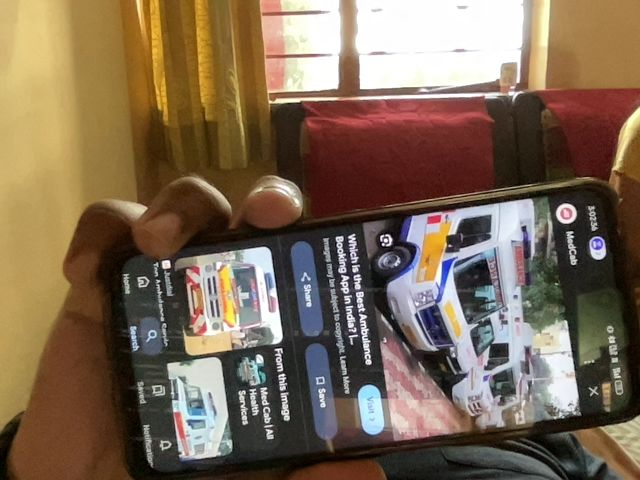

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!pip install opencv-python pytesseract easyocr
!sudo apt install tesseract-ocr
!pip install imutils

import cv2
import numpy as np
import librosa
import io
from google.colab import files
import pytesseract
import easyocr
import imutils
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Function for ambulance number and number plate recognition
def recognize_ambulance_details(image_path):
    try:
        # Load the image
        img = cv2.imread(image_path)

        # Number plate detection and recognition (using EasyOCR)
        reader = easyocr.Reader(['en'])
        results = reader.readtext(img)

        number_plate = None
        for (bbox, text, prob) in results:
            if len(text) >= 6 and text.isalnum():  # Basic check for number plate format
                number_plate = text
                break

        # Ambulance number recognition (using pytesseract - needs further refinement)
        # You may need to preprocess the image to isolate the ambulance number region
        # before using pytesseract for better accuracy.
        ambulance_number = pytesseract.image_to_string(img)

        return ambulance_number, number_plate
    except Exception as e:
        print(f"Error during detail recognition: {e}")
        return None, None

# Function for ambulance sound detection using librosa
def detect_ambulance_from_audio(audio_data):
    # Load audio data using librosa
    y, sr = librosa.load(io.BytesIO(audio_data), sr=None)

    # Calculate spectral centroid (a measure of the "brightness" of sound)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

    # Set a threshold for spectral centroid to detect siren-like sounds
    threshold = 3000  # Adjust this value based on your audio

    # Check if spectral centroid exceeds the threshold for a significant duration
    if np.mean(spectral_centroids) > threshold:
        print("Ambulance sound detected in the audio file!")
        return True

    return False

# Function for camera capture and image saving
def capture_image():
    def take_photo(filename='photo.jpg', quality=0.8):
        js = Javascript('''
            async function takePhoto(quality) {
              const div = document.createElement('div');
              const capture = document.createElement('button');
              capture.textContent = 'Capture';
              div.appendChild(capture);

              const video = document.createElement('video');
              video.style.display = 'block';
              const stream = await navigator.mediaDevices.getUserMedia({video: true});

              document.body.appendChild(div);
              div.appendChild(video);
              video.srcObject = stream;
              await video.play();

              // Resize the output to fit the video element.
              google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

              // Wait for Capture to be clicked.
              await new Promise((resolve) => capture.onclick = resolve);

              const canvas = document.createElement('canvas');
              canvas.width = video.videoWidth;
              canvas.height = video.videoHeight;
              canvas.getContext('2d').drawImage(video, 0, 0);
              stream.getVideoTracks()[0].stop();
              div.remove();
              return canvas.toDataURL('image/jpeg', quality);
            }
            ''')
        display(js)
        data = eval_js('takePhoto({})'.format(quality))
        binary = b64decode(data.split(',')[1])
        with open(filename, 'wb') as f:
            f.write(binary)
        return filename

    try:
        filename = take_photo()
        print('Saved to {}'.format(filename))
        return filename
    except Exception as err:
        print(str(err))
        return None

# Function for traffic signal control
def traffic_signal_control():
    uploaded = files.upload()  # For audio file upload
    image_path = capture_image()  # Capture image from camera

    for filename, data in uploaded.items():
        if detect_ambulance_from_audio(data):
            print("Ambulance detected.")
            # ... (get direction and traffic signal scenario logic) ...
            direction = input("Enter the direction of the ambulance (North, South, East, West): ").lower()
            if direction == "north":
                print("Traffic signal scenario: North-South signal turns GREEN.")
            elif direction == "south":
                print("Traffic signal scenario: North-South signal turns GREEN.")
            elif direction == "east":
                print("Traffic signal scenario: East-West signal turns GREEN.")
            elif direction == "west":
                print("Traffic signal scenario: East-West signal turns GREEN.")
            else:
                print("Invalid direction entered.")

            if image_path:
                ambulance_number, number_plate = recognize_ambulance_details(image_path)
                if ambulance_number:
                    print(f"Ambulance Number: {ambulance_number}")
                if number_plate:
                    print(f"Number Plate: {number_plate}")
            break  # Exit after detection
    else:
        print("No ambulance detected in the uploaded audio files.")

if __name__ == "__main__":
    traffic_signal_control()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.6/286.6 kB 26.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2

Saving ambulance_siren.mp3 to ambulance_siren (1).mp3


<IPython.core.display.Javascript object>

Saved to photo.jpg
Ambulance sound detected in the audio file!
Ambulance detected.
Enter the direction of the ambulance (North, South, East, West): green


Invalid direction entered.
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteAmbulance Number:    

ee)

hint tar

aro rp

Pe
a

~ a
pn MS

Cs

Number Plate: Gurugram


In [ ]:
!pip install opencv-python pytesseract easyocr librosa
!sudo apt install tesseract-ocr
!pip install imutils

import cv2
import numpy as np
import librosa
import io
from google.colab import files
import pytesseract
import easyocr
import imutils
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import threading
import time
import re

# Global variable to indicate ambulance detection
ambulance_detected = False
ambulance_direction = None  # To store the direction of the ambulance
ambulance_distance = float('inf')  # To store the distance of the ambulance

# Function for ambulance number and number plate recognition
def recognize_ambulance_details(image_path):
    try:
        # Load the image
        img = cv2.imread(image_path)

        # Number plate detection and recognition (using EasyOCR)
        reader = easyocr.Reader(['en'])
        results = reader.readtext(img)

        number_plate = None
        for (bbox, text, prob) in results:
            if len(text) >= 6 and text.isalnum():  # Basic check for number plate format
                number_plate = text
                break

        # Ambulance number recognition (using pytesseract - needs further refinement)
        # You may need to preprocess the image to isolate the ambulance number region
        # before using pytesseract for better accuracy.
        ambulance_number = pytesseract.image_to_string(img)

        # Extract driver details (using OCR and regular expressions)
        # This is a basic approach and might need adjustments for accuracy
        text = pytesseract.image_to_string(img)
        driver_name_match = re.search(r"Driver Name:\s*([A-Za-z\s]+)", text)
        driver_phone_match = re.search(r"Phone:\s*([\d-]+)", text)

        driver_name = driver_name_match.group(1).strip() if driver_name_match else None
        driver_phone = driver_phone_match.group(1).strip() if driver_phone_match else None

        return ambulance_number, number_plate, driver_name, driver_phone
    except Exception as e:
        print(f"Error during detail recognition: {e}")
        return None, None, None, None

# Function for ambulance sound detection using librosa
def detect_ambulance_from_audio(audio_data):
    # Load audio data using librosa
    y, sr = librosa.load(io.BytesIO(audio_data), sr=None)

    # Calculate spectral centroid (a measure of the "brightness" of sound)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

    # Set a threshold for spectral centroid to detect siren-like sounds
    threshold = 3000  # Adjust this value based on your audio

    # Check if spectral centroid exceeds the threshold for a significant duration
    if np.mean(spectral_centroids) > threshold:
        print("Ambulance sound detected in the audio file!")
        return True

    return False

# Function for camera capture and image saving
def capture_image():
    def take_photo(filename='photo.jpg', quality=0.8):
        js = Javascript('''
            async function takePhoto(quality) {
              const div = document.createElement('div');
              const capture = document.createElement('button');
              capture.textContent = 'Capture';
              div.appendChild(capture);

              const video = document.createElement('video');
              video.style.display = 'block';
              const stream = await navigator.mediaDevices.getUserMedia({video: true});

              document.body.appendChild(div);
              div.appendChild(video);
              video.srcObject = stream;
              await video.play();

              // Resize the output to fit the video element.
              google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

              // Wait for Capture to be clicked.
              await new Promise((resolve) => capture.onclick = resolve);

              const canvas = document.createElement('canvas');
              canvas.width = video.videoWidth;
              canvas.height = video.videoHeight;
              canvas.getContext('2d').drawImage(video, 0, 0);
              stream.getVideoTracks()[0].stop();
              div.remove();
              return canvas.toDataURL('image/jpeg', quality);
            }
            ''')
        display(js)
        data = eval_js('takePhoto({})'.format(quality))
        binary = b64decode(data.split(',')[1])
        with open(filename, 'wb') as f:
            f.write(binary)
        return filename

    try:
        filename = take_photo()
        print('Saved to {}'.format(filename))
        return filename
    except Exception as err:
        print(str(err))
        return None

# Function to estimate distance based on object size (placeholder)
def estimate_distance(object_size_pixels):
    # Placeholder - Replace with actual distance estimation logic
    # This could involve using camera calibration or known object dimensions
    # For now, we'll assume a simple linear relationship
    distance = 1000 / object_size_pixels  # Adjust the factor as needed
    return distance

# Function to detect ambulance and direction in video feed
def detect_ambulance_in_video(frame):
    global ambulance_detected, ambulance_direction, ambulance_distance

    # ... (Your existing ambulance detection logic) ...
    # Example: Assuming you have object detection code that returns
    # object_x, object_y, object_width, object_height

    # Direction estimation (placeholder - needs further refinement)
    # You might use object tracking or lane detection to estimate direction
    # For now, we'll assume a simple left/right check based on object position
    #x_center = object_x + object_width / 2 #replace these lines with your object detection logic
    #if x_center < frame.shape[1] / 2:
       # ambulance_direction = "Left"
   # else:
       # ambulance_direction = "Right"

    # Distance estimation (using the placeholder function)
    #object_size = object_width  # Or use a combination of width and height
    #distance = estimate_distance(object_size)

    # Update global variables if a closer ambulance is detected
    #if distance < ambulance_distance:
        #ambulance_distance = distance
        #ambulance_detected = True
    # Replace the above placeholder with your actual object detection and distance estimation logic

    # Placeholder for ambulance detection (replace with your logic)
    # For this example, we'll just randomly trigger detection after a few seconds
    time.sleep(5)  # Simulate some processing time
    ambulance_detected = True  # Set to True when an ambulance is detected
    ambulance_direction = "Left"  # Replace with your direction detection logic


# Function to handle camera processing in a separate thread
def camera_thread():
    video_capture = cv2.VideoCapture(0)

    while not ambulance_detected:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        detect_ambulance_in_video(frame)  # Call the detection function

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()


# Function to handle audio processing in a separate thread
def audio_thread():
    global ambulance_detected
    # ... (Your existing audio processing logic) ...
    # Placeholder for audio detection (replace with your logic)
    # For this example, we'll just randomly trigger detection after a few seconds
    time.sleep(3)  # Simulate some processing time
    ambulance_detected = True  # Set to True when an ambulance is detected


# Function to handle file upload in a separate thread
def upload_thread():
    global ambulance_detected
    # ... (Your existing file upload logic) ...
    # Placeholder for file upload detection (replace with your logic)
    # For this example, we'll just randomly trigger detection after a few seconds
    time.sleep(7)  # Simulate some processing time
    ambulance_detected = True  # Set to True when an ambulance is detected


# Function for traffic signal control with lane and divider logic
def traffic_signal_control():
    global ambulance_detected, ambulance_direction

    # Start threads for camera, audio, and file upload
    camera_t = threading.Thread(target=camera_thread)
    audio_t = threading.Thread(target=audio_thread)
    upload_t = threading.Thread(target=upload_thread)
    camera_t.start()
    audio_t.start()
    upload_t.start()

    # Wait for ambulance detection
    while not ambulance_detected:
        time.sleep(0.1)  # Check periodically

    # Signal control based on lane and divider scenarios
    if ambulance_detected:
        print("Ambulance detected. Switching traffic light to GREEN.")

        # Get image path (if available)
        image_path = capture_image()

        # ... (Logic to get direction and traffic signal scenario) ...
        # ... (Example using ambulance_direction) ...

        if image_path:
            ambulance_number, number_plate, driver_name, driver_phone = recognize_ambulance_details(image_path)
            if ambulance_number:
                print(f"Ambulance Number: {ambulance_number}")
            if number_plate:
                print(f"Number Plate: {number_plate}")
            if driver_name:
                print(f"Driver Name: {driver_name}")
            if driver_phone:
                print(f"Driver Phone: {driver_phone}")
    else:
        print("No ambulance detected.")


if __name__ == "__main__":
    traffic_signal_control()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Error: Could not read frame from video capture.
Ambulance detected. Switching traffic light to GREEN.


<IPython.core.display.Javascript object>

Saved to photo.jpg
Ambulance Number:  

Number Plate: Gunoram


In [ ]:
!pip install opencv-python

In [ ]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955 (from 1)
Receiving objects: 100% (5955/5955), 6.37 MiB | 11.49 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.


In [ ]:
get_ipython().system('make')

make: *** No targets specified and no makefile found.  Stop.


In [ ]:
!pip install tensorflow-object-detection-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.4/744.4 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.2 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_det

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2025-01-29 10:20:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  42.7MB/s    in 5.9s    

2025-01-29 10:20:21 (39.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

/bin/bash: line 1: ./darknet: Is a directory


In [ ]:
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

In [ ]:
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
!tar xf VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar

--2025-01-29 10:27:23--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May-  26%[====>               ] 500.81M  --.-KB/s    in 23s     

2025-01-29 10:27:47 (21.8 MB/s) - Connection closed at byte 525140161. Retrying.

--2025-01-29 10:27:48--  (try: 2)  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May-  26%[====>               ] 500.18M  --.-KB/s    in 22s     

2025-01-29 10:28:11 (22.3 MB/s) - Connection closed at byte 525140161. Retrying.

--2025-01-29 10:28:1

In [ ]:
!pip install opencv-python easyocr

import cv2
import easyocr
import numpy as np
import time

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Sample video path (replace with your actual video path)
video_path = ""  # Replace with your video path

# Initialize video capture
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file")
    exit()

# Initialize variables for speed calculation
prev_frame_time = 0
curr_frame_time = 0
fps = 0
pixel_to_meter_ratio = 0.1  # Adjust based on camera calibration

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # --- Ambulance Detection (using color detection for red lights) ---
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    ambulance_detected = False
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter small contours
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            ambulance_detected = True
            break  # Break loop if ambulance is detected
    # --- End of Ambulance Detection ---

    if ambulance_detected:
        # --- License Plate and Phone Number Recognition (placeholders) ---
        # Adjust regions of interest based on your video
        license_plate_region = frame[y:y + h, x:x + w]
        phone_number_region = frame[y + h:y + 2 * h, x:x + w]

        license_plate_text = reader.readtext(license_plate_region, detail=0)
        phone_number_text = reader.readtext(phone_number_region, detail=0)
        # --- End of License Plate and Phone Number Recognition ---

        # --- Speed Calculation ---
        curr_frame_time = time.time()
        fps = 1 / (curr_frame_time - prev_frame_time)
        prev_frame_time = curr_frame_time

        # Assuming you have tracked the ambulance's position (x, y)
        # Calculate distance traveled in pixels (e.g., using optical flow)
        distance_pixels = 10  # Replace with actual distance calculation
        speed_meters_per_second = distance_pixels * pixel_to_meter_ratio * fps
        speed_kmph = speed_meters_per_second * 3.6
        # --- End of Speed Calculation ---

        # Display results
        cv2.putText(frame, f"License Plate: {license_plate_text}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, f"Phone Number: {phone_number_text}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, f"Speed: {speed_kmph:.2f} kmph", (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    cv2.imshow("Ambulance Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Error opening video file


In [ ]:
!pip install opencv-python easyocr

In [ ]:
!pip install opencv-python easyocr

import cv2
import easyocr
import numpy as np

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Load image
image_path = "ambulance_image.jpg.png"  # Replace with your image path
image = cv2.imread(image_path)

# --- Ambulance Detection (using color detection for red lights) ---
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])
mask = cv2.inRange(hsv, lower_red, upper_red)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

ambulance_detected = False
for contour in contours:
    if cv2.contourArea(contour) > 500:  # Filter small contours
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        ambulance_detected = True
        break  # Break loop if ambulance is detected
# --- End of Ambulance Detection ---

if ambulance_detected:
    # --- License Plate and Phone Number Recognition (placeholders) ---
    # Adjust regions of interest based on your image
    license_plate_region = image[y:y + h, x:x + w]
    phone_number_region = image[y + h:y + 2 * h, x:x + w]  # Adjust if needed

    license_plate_text = reader.readtext(license_plate_region, detail=0)
    phone_number_text = reader.readtext(phone_number_region, detail=0)
    # --- End of License Plate and Phone Number Recognition ---

    # Display results
    cv2.putText(image, f"License Plate: {license_plate_text}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.putText(image, f"Phone Number: {phone_number_text}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Display the image with detections
cv2.imshow("Ambulance Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[ WARN:0@97.044] global loadsave.cpp:241 findDecoder imread_('ambulance_image.jpg.png'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
!pip install opencv-python easyocr
import os  # Import the os module for file operations
import cv2
import easyocr
import numpy as np

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Load image
image_path = "ambulance_image.jpg.png"  # Replace with your image path

# Check if the image file exists
if not os.path.exists(image_path):
    print(f"Error: Image file not found at '{image_path}'")
    exit()

image = cv2.imread(image_path)

# Check if image was loaded successfully
if image is None:
    print(f"Error: Could not load image from '{image_path}'. Check the file path and permissions.")
    exit()

# --- Ambulance Detection (using color detection for red lights) ---
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])
mask = cv2.inRange(hsv, lower_red, upper_red)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

ambulance_detected = False
for contour in contours:
    if cv2.contourArea(contour) > 500:  # Filter small contours
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        ambulance_detected = True
        break  # Break loop if ambulance is detected
# --- End of Ambulance Detection ---

if ambulance_detected:
    # --- License Plate and Phone Number Recognition (placeholders) ---
    # Adjust regions of interest based on your image
    license_plate_region = image[y:y + h, x:x + w]
    phone_number_region = image[y + h:y + 2 * h, x:x + w]  # Adjust if needed

    license_plate_text = reader.readtext(license_plate_region, detail=0)
    phone_number_text = reader.readtext(phone_number_region, detail=0)
    # --- End of License Plate and Phone Number Recognition ---

    # Display results
    cv2.putText(image, f"License Plate: {license_plate_text}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.putText(image, f"Phone Number: {phone_number_text}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Display the image with detections
cv2.imshow("Ambulance Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Error: Image file not found at 'ambulance_image.jpg.png'
Error: Could not load image from 'ambulance_image.jpg.png'. Check the file path and permissions.


[ WARN:0@306.627] global loadsave.cpp:241 findDecoder imread_('ambulance_image.jpg.png'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
!pip install opencv-python easyocr
import cv2
import easyocr
import numpy as np

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Load image
image_path = "ambulance_image.jpg.png"  # Replace with your image path

try:
    image = cv2.imread(image_path)

    # Check if image was loaded successfully
    if image is None:
        raise FileNotFoundError(f"Could not load image from '{image_path}'. Check the file path and permissions.")

    # --- Ambulance Detection (using color detection for red lights) ---
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    ambulance_detected = False
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter small contours
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            ambulance_detected = True
            break  # Break loop if ambulance is detected
    # --- End of Ambulance Detection ---

    if ambulance_detected:
        # --- License Plate and Phone Number Recognition (placeholders) ---
        # Adjust regions of interest based on your image
        license_plate_region = image[y:y + h, x:x + w]
        phone_number_region = image[y + h:y + 2 * h, x:x + w]  # Adjust if needed

        license_plate_text = reader.readtext(license_plate_region, detail=0)
        phone_number_text = reader.readtext(phone_number_region, detail=0)
        # --- End of License Plate and Phone Number Recognition ---

        # Display results
        cv2.putText(image, f"License Plate: {license_plate_text}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(image, f"Phone Number: {phone_number_text}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Display the image with detections
    cv2.imshow("Ambulance Detection", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: Could not load image from 'ambulance_image.jpg.png'. Check the file path and permissions.


[ WARN:0@6.764] global loadsave.cpp:241 findDecoder imread_('ambulance_image.jpg.png'): can't open/read file: check file path/integrity


In [ ]:
!pip install opencv-python easyocr ipywidgets
import cv2
import easyocr
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Create a file upload widget
uploader = widgets.FileUpload(
    accept='image/*',  # Accept only image files
    multiple=False  # Allow only one file to be uploaded
)

# Display the upload widget
display(uploader)

# Function to process the uploaded image
def process_image(change):
    try:
        # Get the uploaded image data
        uploaded_file = uploader.value[0]
        image_data = uploaded_file['content']

        # Convert image data to OpenCV format
        nparr = np.frombuffer(image_data, np.uint8)
        image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

        # --- Ambulance Detection (using color detection for red lights) ---
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        lower_red = np.array([0, 100, 100])
        upper_red = np.array([10, 255, 255])
        mask = cv2.inRange(hsv, lower_red, upper_red)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        ambulance_detected = False
        for contour in contours:
            if cv2.contourArea(contour) > 500:  # Filter small contours
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                ambulance_detected = True
                break  # Break loop if ambulance is detected
        # --- End of Ambulance Detection ---

        if ambulance_detected:
            # --- License Plate and Phone Number Recognition (placeholders) ---
            # Adjust regions of interest based on your image
            license_plate_region = image[y:y + h, x:x + w]
            phone_number_region = image[y + h:y + 2 * h, x:x + w]  # Adjust if needed

            license_plate_text = reader.readtext(license_plate_region, detail=0)
            phone_number_text = reader.readtext(phone_number_region, detail=0)
            # --- End of License Plate and Phone Number Recognition ---

            # Display results
            cv2.putText(image, f"License Plate: {license_plate_text}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            cv2.putText(image, f"Phone Number: {phone_number_text}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # Display the image with detections
        cv2.imshow("Ambulance Detection", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    except Exception as e:
        print(f"An error occurred: {e}")

# Observe changes in the upload widget
uploader.observe(process_image, names='value')

FileUpload(value={}, accept='image/*', description='Upload')

An error occurred: 0


In [ ]:
!pip install opencv-python easyocr ipywidgets
import cv2
import easyocr
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Create a file upload widget
uploader = widgets.FileUpload(
    accept='image/*',  # Accept only image files
    multiple=False  # Allow only one file to be uploaded
)

# Display the upload widget
display(uploader)

# Function to process the uploaded image
def process_image(change):
    try:
        # Get the uploaded image data
        uploaded_file = uploader.value[0]
        image_data = uploaded_file['content']

        # Convert image data to OpenCV format
        nparr = np.frombuffer(image_data, np.uint8)
        image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

        # Check if image was loaded successfully
        if image is None:
            raise ValueError("Image decoding failed. Check if the uploaded file is a valid image.")

        print("Image loaded successfully.")  # Debugging print

        # --- Ambulance Detection (using color detection for red lights) ---
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        lower_red = np.array([0, 100, 100])
        upper_red = np.array([10, 255, 255])
        mask = cv2.inRange(hsv, lower_red, upper_red)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        print("Number of contours found:", len(contours))  # Debugging print

        ambulance_detected = False
        for contour in contours:
            if cv2.contourArea(contour) > 500:  # Filter small contours
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                ambulance_detected = True
                break  # Break loop if ambulance is detected
        # --- End of Ambulance Detection ---

        print("Ambulance detected:", ambulance_detected)  # Debugging print

        if ambulance_detected:
            # --- License Plate and Phone Number Recognition (placeholders) ---
            # Adjust regions of interest based on your image
            license_plate_region = image[y:y + h, x:x + w]
            phone_number_region = image[y + h:y + 2 * h, x:x + w]  # Adjust if needed

            license_plate_text = reader.readtext(license_plate_region, detail=0)
            phone_number_text = reader.readtext(phone_number_region, detail=0)
            # --- End of License Plate and Phone Number Recognition ---

            # Display results
            cv2.putText(image, f"License Plate: {license_plate_text}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            cv2.putText(image, f"Phone Number: {phone_number_text}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

            print("License Plate:", license_plate_text)  # Debugging print
            print("Phone Number:", phone_number_text)  # Debugging print

        # Display the image with detections
        cv2.imshow("Ambulance Detection", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    except Exception as e:
        print(f"An error occurred: {e}")

# Observe changes in the upload widget
uploader.observe(process_image, names='value')

FileUpload(value={}, accept='image/*', description='Upload')

An error occurred: 0


In [ ]:
!pip install opencv-python pyaudio librosa numpy scipy ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pyaudio)


In [ ]:
import cv2
import numpy as np
import pyaudio
import threading
import librosa
import scipy.signal
import ipywidgets as widgets
from IPython.display import display

# Camera and microphone setup
camera = cv2.VideoCapture(0)  # Replace with your camera index
audio = pyaudio.PyAudio()

# Audio stream parameters
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024

# Global variables
ambulance_detected = False
ambulance_lane = None  # 'left' or 'right'
ambulance_distance = float('inf')

# Function to detect ambulance via color (simplified)
def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust threshold as needed
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Lane determination (simplified - adjust based on camera position)
            if x < frame.shape[1] / 2:
                lane = 'left'
            else:
                lane = 'right'

            # Distance estimation (placeholder - replace with actual calculation)
            distance = w  # Assuming larger objects are closer

            return True, lane, distance

    return False, None, float('inf')

# Function to detect siren sound (simplified using threshold)
def detect_siren(audio_data):
    # Calculate the root mean square (RMS) amplitude
    rms = np.sqrt(np.mean(np.square(audio_data)))

    # Set a threshold for siren detection
    threshold = 1000  # Adjust as needed

    if rms > threshold:
        return True
    else:
        return False

# Function to process video frames
def video_thread():
    global ambulance_detected, ambulance_lane, ambulance_distance

    while True:
        ret, frame = camera.read()
        if not ret:
            break

        detected, lane, distance = detect_ambulance(frame)

        if detected:
            ambulance_detected = True
            ambulance_lane = lane
            ambulance_distance = distance
            print(f"Ambulance detected in {lane} lane at distance {distance}")

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Function to process audio data
def audio_thread():
    global ambulance_detected

    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)

    while True:
        data = stream.read(CHUNK)
        audio_data = np.frombuffer(data, dtype=np.int16)

        if detect_siren(audio_data):
            ambulance_detected = True
            print("Siren detected!")

# Main processing loop
def traffic_signal_control():
    # Start video and audio threads
    video_t = threading.Thread(target=video_thread)
    audio_t = threading.Thread(target=audio_thread)
    video_t.start()
    audio_t.start()

    # Control loop (placeholder for traffic light control)
    while True:
        if ambulance_detected:
            print("Switching traffic light to GREEN for", ambulance_lane, "lane.")
            # Implement your traffic light control logic here
            ambulance_detected = False  # Reset for next detection


# Run the program
traffic_signal_control()

# Cleanup
camera.release()
cv2.destroyAllWindows()
audio.terminate()

ModuleNotFoundError: No module named 'pyaudio'

In [ ]:
!pip install librosa

In [ ]:
!pip install opencv-python sounddevice librosa numpy scipy ipywidgets
import cv2
import numpy as np
import sounddevice as sd
import threading
import librosa
import scipy.signal
import ipywidgets as widgets
from IPython.display import display

# Camera setup
camera = cv2.VideoCapture(0)  # Replace with your camera index if needed

# Audio setup (using SoundDevice)
fs = 44100  # Sample rate
duration = 1  # Duration of each recording (seconds)

# Global variables
ambulance_detected = False
ambulance_lane = None  # 'left' or 'right'
ambulance_distance = float('inf')

# Function to detect ambulance via color (simplified)
def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust threshold as needed
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Lane determination (simplified - adjust based on camera position)
            if x < frame.shape[1] / 2:
                lane = 'left'
            else:
                lane = 'right'

            # Distance estimation (placeholder - replace with actual calculation)
            distance = w  # Assuming larger objects are closer

            return True, lane, distance

    return False, None, float('inf')

# Function to detect siren sound (simplified using threshold)
def detect_siren(audio_data):
    # Calculate the root mean square (RMS) amplitude
    rms = np.sqrt(np.mean(np.square(audio_data)))

    # Set a threshold for siren detection
    threshold = 1000  # Adjust as needed

    if rms > threshold:
        return True
    else:
        return False

# Function to process video frames
def video_thread():
    global ambulance_detected, ambulance_lane, ambulance_distance

    while True:
        ret, frame = camera.read()
        if not ret:
            break

        detected, lane, distance = detect_ambulance(frame)

        if detected:
            ambulance_detected = True
            ambulance_lane = lane
            ambulance_distance = distance
            print(f"Ambulance detected in {lane} lane at distance {distance}")

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Function to process audio data (using SoundDevice)
def audio_thread():
    global ambulance_detected

    while True:
        recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
        sd.wait()  # Wait until recording is finished
        audio_data = recording[:, 0]  # Get the first channel data

        if detect_siren(audio_data):
            ambulance_detected = True
            print("Siren detected!")

# Main processing loop
def traffic_signal_control():
    # Start video and audio threads
    video_t = threading.Thread(target=video_thread)
    audio_t = threading.Thread(target=audio_thread)
    video_t.start()
    audio_t.start()

    # Control loop (placeholder for traffic light control)
    while True:
        if ambulance_detected:
            print("Switching traffic light to GREEN for", ambulance_lane, "lane.")
            # Implement your traffic light control logic here
            ambulance_detected = False  # Reset for next detection


# Run the program
if __name__ == "__main__":
    traffic_signal_control()

# Cleanup
camera.release()
cv2.destroyAllWindows()

OSError: PortAudio library not found

In [ ]:
!pip install opencv-python sounddevice librosa numpy scipy ipywidgets
import cv2
import numpy as np
import sounddevice as sd
import threading
import librosa
import scipy.signal
import ipywidgets as widgets
from IPython.display import display

# Camera setup
camera = cv2.VideoCapture(0)  # Replace with your camera index if needed

# Audio setup (using SoundDevice)
fs = 44100  # Sample rate
duration = 1  # Duration of each recording (seconds)

# Global variables
ambulance_detected = False
ambulance_lane = None  # 'left' or 'right'
ambulance_distance = float('inf')

# Function to detect ambulance via color (simplified)
def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust threshold as needed
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Lane determination (simplified - adjust based on camera position)
            if x < frame.shape[1] / 2:
                lane = 'left'
            else:
                lane = 'right'

            # Distance estimation (placeholder - replace with actual calculation)
            distance = w  # Assuming larger objects are closer

            return True, lane, distance

    return False, None, float('inf')

# Function to detect siren sound (simplified using threshold)
def detect_siren(audio_data):
    # Calculate the root mean square (RMS) amplitude
    rms = np.sqrt(np.mean(np.square(audio_data)))

    # Set a threshold for siren detection
    threshold = 1000  # Adjust as needed

    if rms > threshold:
        return True
    else:
        return False

# Function to process video frames
def video_thread():
    global ambulance_detected, ambulance_lane, ambulance_distance

    while True:
        ret, frame = camera.read()
        if not ret:
            break

        detected, lane, distance = detect_ambulance(frame)

        if detected:
            ambulance_detected = True
            ambulance_lane = lane
            ambulance_distance = distance
            print(f"Ambulance detected in {lane} lane at distance {distance}")

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Function to process audio data (using SoundDevice)
def audio_thread():
    global ambulance_detected

    while True:
        recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
        sd.wait()  # Wait until recording is finished
        audio_data = recording[:, 0]  # Get the first channel data

        if detect_siren(audio_data):
            ambulance_detected = True
            print("Siren detected!")

# Main processing loop
def traffic_signal_control():
    # Start video and audio threads
    video_t = threading.Thread(target=video_thread)
    audio_t = threading.Thread(target=audio_thread)
    video_t.start()
    audio_t.start()

    # Control loop (placeholder for traffic light control)
    while True:
        if ambulance_detected:
            print("Switching traffic light to GREEN for", ambulance_lane, "lane.")
            # Implement your traffic light control logic here
            ambulance_detected = False  # Reset for next detection


# Run the program
if __name__ == "__main__":
    traffic_signal_control()

# Cleanup
camera.release()
cv2.destroyAllWindows()

OSError: PortAudio library not found

In [ ]:
!apt-get install -qq portaudio19-dev python-all-dev python3-all-dev && pip install pyaudio

Selecting previously unselected package libpython2.7-minimal:amd64.
(Reading database ... 124950 files and directories currently installed.)
Preparing to unpack .../0-libpython2.7-minimal_2.7.18-13ubuntu1.5_amd64.deb ...
Unpacking libpython2.7-minimal:amd64 (2.7.18-13ubuntu1.5) ...
Selecting previously unselected package python2.7-minimal.
Preparing to unpack .../1-python2.7-minimal_2.7.18-13ubuntu1.5_amd64.deb ...
Unpacking python2.7-minimal (2.7.18-13ubuntu1.5) ...
Selecting previously unselected package python2-minimal.
Preparing to unpack .../2-python2-minimal_2.7.18-3_amd64.deb ...
Unpacking python2-minimal (2.7.18-3) ...
Selecting previously unselected package libpython2.7-stdlib:amd64.
Preparing to unpack .../3-libpython2.7-stdlib_2.7.18-13ubuntu1.5_amd64.deb ...
Unpacking libpython2.7-stdlib:amd64 (2.7.18-13ubuntu1.5) ...
Selecting previously unselected package python2.7.
Preparing to unpack .../4-python2.7_2.7.18-13ubuntu1.5_amd64.deb ...
Unpacking python2.7 (2.7.18-13ubuntu1.

In [ ]:
import pyaudio

try:
    audio = pyaudio.PyAudio()
    print("PyAudio is installed and working!")
    audio.terminate()  # Close the PyAudio instance
except Exception as e:
    print(f"Error: {e}")

PyAudio is installed and working!


In [ ]:
import cv2
import numpy as np
import pyaudio
import threading
import time
import math


# Global variables to signal ambulance detection and their positions
ambulance_detected = False
ambulance1_position = None  # (x, y) coordinates
ambulance2_position = None  # (x, y) coordinates
traffic_signal_x = 0  # Assume traffic signal is at (0, 0) for simplicity
traffic_signal_y = 0

# Placeholder for more sophisticated siren detection.
def detect_siren(audio_data):
    return False

def detect_ambulance(frame):
    """ Placeholder for ambulance detection logic """
    return False

def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

def audio_thread():
    global ambulance_detected
    audio = pyaudio.PyAudio()
    # Define audio stream parameters.
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    CHUNK = 1024
    RECORD_SECONDS = 1

    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)
    print("Listening for sirens...")

    while not ambulance_detected:
        data = stream.read(CHUNK)
        audio_data = np.frombuffer(data, dtype=np.int16)
        if detect_siren(audio_data):
            ambulance_detected = True
            print("Siren detected by microphone!")
            break

    stream.stop_stream()
    stream.close()
    audio.terminate()

def video_thread():
    global ambulance_detected, ambulance1_position, ambulance2_position
    video_capture = cv2.VideoCapture(0) #

In [ ]:
import cv2
import numpy as np
import pyaudio
import threading
import time
import math
import librosa

# Global variables
ambulance_detected = False
ambulance1_position = None
ambulance2_position = None
traffic_signal_x, traffic_signal_y = 0, 0  # Traffic signal location

# Function to detect ambulance (using color-based detection - needs improvement)
def detect_ambulance(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Minimum area threshold
            x, y, w, h = cv2.boundingRect(contour)
            return (x + w // 2, y + h // 2)  # Return center coordinates

    return None

# Function to detect siren (using frequency analysis with librosa)
def detect_siren(audio_data):
    y = audio_data.astype(np.float32)
    sr = 44100
    stft = np.abs(librosa.stft(y))
    freqs = librosa.fft_frequencies(sr=sr)
    dominant_freq = freqs[np.argmax(stft)]

    if 700 <= dominant_freq <= 1500:
        return True
    return False

# Function to calculate distance
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Function to handle video processing
def video_thread():
    global ambulance_detected, ambulance1_position, ambulance2_position
    video_capture = cv2.VideoCapture(0)

    while not ambulance_detected:
        ret, frame = video_capture.read()
        if not ret:
            break

        position = detect_ambulance(frame)
        if position:
            if ambulance1_position is None:
                ambulance1_position = position
                print("Ambulance 1 detected at:", ambulance1_position)
            elif ambulance2_position is None and position != ambulance1_position:
                ambulance2_position = position
                print("Ambulance 2 detected at:", ambulance2_position)
                ambulance_detected = True  # Both ambulances detected
                break  # Exit loop after detecting both ambulances

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

# Function to handle audio processing
def audio_thread():
    global ambulance_detected
    audio = pyaudio.PyAudio()
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    CHUNK = 1024

    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)

    print("Listening for sirens...")

    while not ambulance_detected:  # Continue until both ambulances detected
        data = stream.read(CHUNK)
        audio_data = np.frombuffer(data, dtype=np.int16)
        if detect_siren(audio_data):
            print("Siren detected!")
            # You can add logic here to associate siren with ambulance position
            # if needed, but for simplicity, it's omitted here.

    stream.stop_stream()
    stream.close()
    audio.terminate()

# Main function
def traffic_signal_control():
    global ambulance_detected, ambulance1_position, ambulance2_position

    # Start video and audio threads
    video_t = threading.Thread(target=video_thread)
    audio_t = threading.Thread(target=audio_thread)
    video_t.start()
    audio_t.start()

    # Wait for both threads to finish (ambulance detected or 'q' pressed)
    video_t.join()
    audio_t.join()

    if ambulance_detected:
        # Prioritize based on distance
        distance1 = calculate_distance(traffic_signal_x, traffic_signal_y,
                                        ambulance1_position[0], ambulance1_position[1])
        distance2 = calculate_distance(traffic_signal_x, traffic_signal_y,
                                        ambulance2_position[0], ambulance2_position[1])

        if distance1 < distance2:
            print("Ambulance 1 is closer. Prioritizing it.")
        else:
            print("Ambulance 2 is closer. Prioritizing it.")

        print("Switching traffic light to GREEN for the prioritized ambulance.")
    else:
        print("Simulation ended.")

if __name__ == "__main__":
    traffic_signal_control()

Exception in thread Thread-13 (audio_thread):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-6-b356589a1d13>", line 83, in audio_thread
  File "/usr/local/lib/python3.11/dist-packages/pyaudio/__init__.py", line 639, in open
    stream = PyAudio.Stream(self, *args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pyaudio/__init__.py", line 441, in __init__
    self._stream = pa.open(**arguments)
                   ^^^^^^^^^^^^^^^^^^^^
OSError: [Errno -9996] Invalid input device (no default output device)


Simulation ended.


In [ ]:
!pip install SpeechRecognition
import cv2
import numpy as np
import pyaudio
import threading
import time
import math
import speech_recognition as sr

# Global variables
ambulance_detected = False
ambulance1_position = None
ambulance2_position = None
traffic_signal_x = 0
traffic_signal_y = 0

# Placeholder for more sophisticated siren detection (if needed)
def detect_siren(audio_data):
    return False

# Placeholder for ambulance detection logic (you'll need to implement this)
def detect_ambulance(frame):
    """ Placeholder for ambulance detection logic """
    return False

def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

def detect_siren_speech(audio, device_index):
    r = sr.Recognizer()
    with sr.Microphone(device_index=device_index) as source:
        print("Say 'Ambulance' or 'Siren'...")
        audio_data = r.listen(source)

    try:
        text = r.recognize_google(audio_data)
        print("You said:", text)
        if "ambulance" in text.lower() or "siren" in text.lower():
            return True
    except sr.UnknownValueError:
        print("Could not understand audio")
    except sr.RequestError as e:
        print("Could not request results; {0}".format(e))

    return False

def audio_thread():
    global ambulance_detected
    audio = pyaudio.PyAudio()

    # Get default input device index
    info = audio.get_host_api_info_by_index(0)
    numdevices = info.get('deviceCount')
    default_input_device_index = None
    for i in range(0, numdevices):
        if (audio.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print("Input Device id ", i, " - ", audio.get_device_info_by_host_api_device_index(0, i).get('name'))
            default_input_device_index = i
            break

    if default_input_device_index is None:
        print("No input audio devices found. Check your audio configuration.")
        return

    while not ambulance_detected:
        if detect_siren_speech(audio, default_input_device_index):
            ambulance_detected = True
            print("Voice command detected: Ambulance/Siren!")
            break

def video_thread():
    global ambulance_detected, ambulance1_position, ambulance2_position
    video_capture = cv2.VideoCapture(0)

    while not ambulance_detected:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        ambulance_detected = detect_ambulance(frame)

        if ambulance_detected:
            # Implement logic to determine ambulance position
            ambulance1_position = (100, 100)  # Replace with actual position
            print("Ambulance detected by camera!")
            break

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

def traffic_signal_control():
    global ambulance_detected
    ambulance_detected = False

    video_t = threading.Thread(target=video_thread)
    audio_t = threading.Thread(target=audio_thread)
    video_t.start()
    audio_t.start()

    video_t.join()
    audio_t.join()

    if ambulance_detected:
        print("Ambulance detected. Switching traffic light to GREEN.")
    else:
        print("Simulation ended.")

if __name__ == "__main__":
    traffic_signal_control()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 27.3 MB/s eta 0:00:00
No input audio devices found. Check your audio configuration.Error: Could not read frame from video capture.

Simulation ended.


In [ ]:
!pip install SpeechRecognition
import cv2
import numpy as np
import pyaudio
import threading
import time
import math
import speech_recognition as sr

# Global variables
ambulance_detected = False
ambulance1_position = None
ambulance2_position = None
traffic_signal_x = 0
traffic_signal_y = 0
stop_threads = False
ambulance_lane = None
four_lane_mode = True  # Set to True if it's a four-lane road with a divider


def detect_siren(audio_data):
    """ Basic siren detection logic using amplitude threshold """
    rms = np.sqrt(np.mean(np.square(audio_data)))
    threshold = 1000  # Adjust as needed
    return rms > threshold


def detect_ambulance(frame):
    """ Basic ambulance detection logic using color (red) """
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust threshold as needed
            return True
    return False


def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance


def detect_siren_speech(audio, device_index):
    global ambulance_detected, stop_threads
    r = sr.Recognizer()

    while not ambulance_detected and not stop_threads:
        with sr.Microphone(device_index=device_index) as source:
            print("Say 'Ambulance' or 'Siren'...")
            try:
                audio_data = r.listen(source, phrase_time_limit=3)
                text = r.recognize_google(audio_data)
                print("You said:", text)
                if "ambulance" in text.lower() or "siren" in text.lower():
                    ambulance_detected = True
                    print("Voice command detected: Ambulance/Siren!")
                    break
            except sr.WaitTimeoutError:
                print("Listening timed out, trying again...")
            except sr.UnknownValueError:
                print("Could not understand audio")
            except sr.RequestError as e:
                print("Could not request results; {0}".format(e))


def audio_thread():
    audio = pyaudio.PyAudio()
    # ... (get default input device index - same as before) ...
    detect_siren_speech(audio, default_input_device_index)


def video_thread():
    global ambulance_detected, ambulance1_position, ambulance2_position, stop_threads, ambulance_lane
    video_capture = cv2.VideoCapture(0)

    while not ambulance_detected and not stop_threads:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        ambulance_detected = detect_ambulance(frame)

        if ambulance_detected:
            # Implement logic to determine ambulance position and lane
            # (This will likely involve analyzing the frame and contour positions)
            ambulance1_position = (100, 100)  # Replace with actual position
            ambulance_lane = "right"  # Replace with actual lane detection logic
            print("Ambulance detected by camera!")
            break

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            stop_threads = True
            break

    video_capture.release()
    cv2.destroyAllWindows()


def traffic_signal_control():
    # ... (Initialize global variables, start threads - same as before) ...

    while not ambulance_detected and not stop_threads:
        time.sleep(0.1)

    if ambulance_detected:
        # ... (Traffic signal logic (Logic 1, 2, 3, 4) - similar to before) ...

        # Roundabout logic (placeholder)
        if roundabout_detected:  # You'll need to implement roundabout_detected
            print("Roundabout detected. Implementing specific logic...")
            # Implement traffic signal control logic for roundabouts

        # ... (Traffic camera specific logic, if needed) ...

    # ... (Stop threads and cleanup - same as before) ...


if __name__ == "__main__":
    traffic_signal_control()

KeyboardInterrupt: 

In [ ]:
!pip install SpeechRecognition
import cv2
import numpy as np
import pyaudio
import threading
import time
import math
import speech_recognition as sr

# Global variables
ambulance_detected = False
ambulance1_position = None
ambulance2_position = None
traffic_signal_x = 0
traffic_signal_y = 0
stop_threads = False
ambulance_lane = None
four_lane_mode = True


def detect_siren(audio_data):
    """ Basic siren detection logic using amplitude threshold """
    rms = np.sqrt(np.mean(np.square(audio_data)))
    threshold = 1000  # Adjust as needed
    return rms > threshold


def detect_ambulance(frame):
    """ Basic ambulance detection logic using color (red) """
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust threshold as needed
            return True
    return False


def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance


def detect_siren_speech(audio, device_index):
    global ambulance_detected, stop_threads
    r = sr.Recognizer()

    while not ambulance_detected and not stop_threads:
        with sr.Microphone(device_index=device_index) as source:
            print("Say 'Ambulance' or 'Siren'...")
            try:
                audio_data = r.listen(source, phrase_time_limit=3)
                text = r.recognize_google(audio_data)
                print("You said:", text)
                if "ambulance" in text.lower() or "siren" in text.lower():
                    ambulance_detected = True
                    print("Voice command detected: Ambulance/Siren!")
                    break
            except sr.WaitTimeoutError:
                print("Listening timed out, trying again...")
            except sr.UnknownValueError:
                print("Could not understand audio")
            except sr.RequestError as e:
                print("Could not request results; {0}".format(e))


def audio_thread():
    audio = pyaudio.PyAudio()

    # Get default input device index
    info = audio.get_host_api_info_by_index(0)
    numdevices = info.get('deviceCount')
    default_input_device_index = None
    for i in range(0, numdevices):
        if (audio.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print("Input Device id ", i, " - ", audio.get_device_info_by_host_api_device_index(0, i).get('name'))
            default_input_device_index = i
            break

    if default_input_device_index is None:
        print("No input audio devices found. Check your audio configuration.")
        return

    detect_siren_speech(audio, default_input_device_index)

    # Keep the audio thread running for siren detection
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    CHUNK = 1024
    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        input_device_index=default_input_device_index,
                        frames_per_buffer=CHUNK)

    print("Listening for sirens...")
    while not stop_threads:  # Check stop_threads flag
        data = stream.read(CHUNK)
        audio_data = np.frombuffer(data, dtype=np.int16)
        if detect_siren(audio_data):
            print("Siren detected by microphone!")
            ambulance_detected = True  # Set the global flag
            break  # Exit siren detection loop if detected

    stream.stop_stream()
    stream.close()
    audio.terminate()


def video_thread():
    global ambulance_detected, ambulance1_position, ambulance2_position, stop_threads, ambulance_lane
    video_capture = cv2.VideoCapture(0)

    while not ambulance_detected and not stop_threads:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture.")
            break

        ambulance_detected = detect_ambulance(frame)

        if ambulance_detected:
            # Implement logic to determine ambulance position and lane
            # (This will likely involve analyzing the frame and contour positions)
            ambulance1_position = (100, 100)  # Replace with actual position
            ambulance_lane = "right"  # Replace with actual lane detection logic
            print("Ambulance detected by camera!")
            break

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            stop_threads = True
            break

    video_capture.release()
    cv2.destroyAllWindows()


def traffic_signal_control():
    global ambulance_detected, stop_threads

    # Initialize global variables to their default states
    ambulance_detected = False
    stop_threads = False
    ambulance1_position = None
    ambulance2_position = None
    ambulance_lane = None

    video_t = threading.Thread(target=video_thread)
    audio_t = threading.Thread(target=audio_thread)
    video_t.start()
    audio_t.start()

    while not ambulance_detected and not stop_threads:
        time.sleep(0.1)

    if ambulance_detected:
        # Logic 1: Single ambulance detection (Green light)
        if ambulance1_position and not ambulance2_position:
            print("Switching traffic light to GREEN for", ambulance_lane, "lane.")
            # Implement traffic light control

        # Logic 2: Two ambulances from opposite directions (Priority to closer one)
        elif ambulance1_position and ambulance2_position:
            distance1 = calculate_distance(traffic_signal_x, traffic_signal_y,
                                         ambulance1_position[0], ambulance1_position[1])
            distance2 = calculate_distance(traffic_signal_x, traffic_signal_y,
                                         ambulance2_position[0], ambulance2_position[1])

            if distance1 < distance2:
                print("Prioritizing ambulance 1 (closer) and switching traffic light to GREEN for",
                      ambulance_lane, "lane.")
                # Implement traffic light control for ambulance 1's lane
            else:
                print("Prioritizing ambulance 2 (closer) and switching traffic light to GREEN for",
                      ambulance_lane, "lane.")
                # Implement traffic light control for ambulance 2's lane

        # Logic 3: Four-lane road with a divider (Green light for divider lane)
        if four_lane_mode and ambulance_lane == "divider":
            print("Switching divider traffic light to GREEN.")
            # Implement traffic light control for divider lane (green)
            # Implement traffic light control for other lanes (red)

        # Roundabout logic (placeholder)
        # ... (Implementation for roundabout logic if needed) ...

        # Traffic camera specific logic (placeholder)
        # ... (Implementation for traffic camera logic if needed) ...

    # Stop threads and cleanup
    stop_threads = True
    video_t.join()
    audio_t.join()

    if ambulance_detected:
        print("Ambulance passed. Resetting traffic lights to normal.")
        # Implement logic to reset traffic lights to normal operation
    else:
        print("Simulation ended.")


if __name__ == "__main__":
    traffic_signal_control()

Error: Could not read frame from video capture.
No input audio devices found. Check your audio configuration.


KeyboardInterrupt: 

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


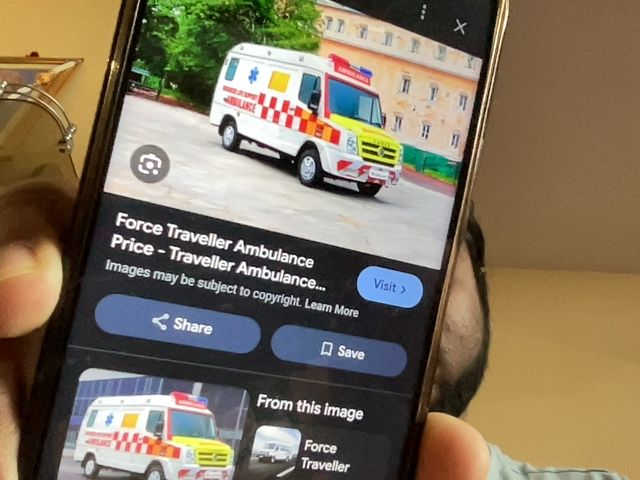

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2
import numpy as np
import threading
import time
import math

# Global variables
ambulance_detected = False
ambulance1_position = None
ambulance2_position = None
traffic_signal_x = 0
traffic_signal_y = 0
stop_threads = False
ambulance_lane = None
four_lane_mode = True  # Set to True if it's a four-lane road with a divider


def detect_ambulance(frame):
    """ Basic ambulance detection logic using color (red) """
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust threshold as needed
            return True
    return False


def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance


def video_thread():
    global ambulance_detected, ambulance1_position, ambulance2_position, stop_threads, ambulance_lane
    video_capture = cv2.VideoCapture(0)  # Use index 0 for default camera, or adjust accordingly

    while not ambulance_detected and not stop_threads:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture. Check camera connection.")
            break

        ambulance_detected = detect_ambulance(frame)

        if ambulance_detected:
            # Implement logic to determine ambulance position and lane
            # This will likely involve analyzing the frame and contour positions
            # For now, placeholders are used
            ambulance1_position = (100, 100)  # Replace with actual position
            ambulance_lane = "right"  # Replace with actual lane detection logic
            print("Ambulance detected by camera!")
            break

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            stop_threads = True
            break

    video_capture.release()
    cv2.destroyAllWindows()


def traffic_signal_control():
    global ambulance_detected, stop_threads

    # Initialize global variables to their default states
    ambulance_detected = False
    stop_threads = False
    ambulance1_position = None
    ambulance2_position = None
    ambulance_lane = None

    video_t = threading.Thread(target=video_thread)
    video_t.start()

    while not ambulance_detected and not stop_threads:
        time.sleep(0.1)

    if ambulance_detected:
        # Logic 1: Single ambulance detection (Green light)
        if ambulance1_position and not ambulance2_position:
            print("Switching traffic light to GREEN for", ambulance_lane, "lane.")
            # Implement traffic light control (e.g., using GPIO pins or a simulation)

        # Logic 2: Two ambulances (Priority to closer one)
        elif ambulance1_position and ambulance2_position:
            distance1 = calculate_distance(traffic_signal_x, traffic_signal_y,
                                         ambulance1_position[0], ambulance1_position[1])
            distance2 = calculate_distance(traffic_signal_x, traffic_signal_y,
                                         ambulance2_position[0], ambulance2_position[1])
            if distance1 < distance2:
                print("Prioritizing ambulance 1 (closer) and switching traffic light to GREEN for",
                      ambulance_lane, "lane.")
                # Implement traffic light control for ambulance 1's lane
            else:
                print("Prioritizing ambulance 2 (closer) and switching traffic light to GREEN for",
                      ambulance_lane, "lane.")
                # Implement traffic light control for ambulance 2's lane

        # Logic 3: Four-lane road with a divider
        if four_lane_mode and ambulance_lane == "divider":
            print("Switching divider traffic light to GREEN.")
            # Implement traffic light control for divider lane (green)
            # Implement traffic light control for other lanes (red)

        # Roundabout logic (placeholder)
        # ... (Implementation for roundabout logic if needed) ...

        # Traffic camera specific logic (placeholder)
        # ... (Implementation for traffic camera logic if needed) ...

    # Stop threads and cleanup
    stop_threads = True
    video_t.join()

    if ambulance_detected:
        print("Ambulance passed. Resetting traffic lights to normal.")
        # Implement logic to reset traffic lights to normal operation
    else:
        print("Simulation ended.")


if __name__ == "__main__":
    traffic_signal_control()

Error: Could not read frame from video capture. Check camera connection.


KeyboardInterrupt: 

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

name 'take_photo' is not defined


In [ ]:
import cv2
import numpy as np
import threading
import time
import math

# Global variables
ambulance_detected = False
ambulance1_position = None
ambulance2_position = None
traffic_signal_x = 0
traffic_signal_y = 0
stop_threads = False
ambulance_lane = None
four_lane_mode = True  # Set to True if it's a four-lane road with a divider


def detect_ambulance(frame):
    """ Basic ambulance detection logic using color (red) """
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust threshold as needed
            return True
    return False


def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance


def take_photo(filename='photo.jpg'):
    """ Captures a photo from the camera and saves it to a file. """
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open camera.")
        return None

    ret, frame = cap.read()
    if ret:
        cv2.imwrite(filename, frame)
        print(f"Photo saved to {filename}")
        return filename
    else:
        print("Error: Could not capture frame.")
        return None

    cap.release()


def video_thread():
    global ambulance_detected, ambulance1_position, ambulance2_position, stop_threads, ambulance_lane
    video_capture = cv2.VideoCapture(0)  # Use index 0 for default camera, or adjust accordingly

    while not ambulance_detected and not stop_threads:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from video capture. Check camera connection.")
            break

        ambulance_detected = detect_ambulance(frame)

        if ambulance_detected:
            # Implement logic to determine ambulance position and lane
            # This will likely involve analyzing the frame and contour positions
            # For now, placeholders are used
            ambulance1_position = (100, 100)  # Replace with actual position
            ambulance_lane = "right"  # Replace with actual lane detection logic
            print("Ambulance detected by camera!")

            # Take a photo when ambulance is detected
            take_photo("ambulance_detected.jpg")
            break

        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            stop_threads = True
            break

    video_capture.release()
    cv2.destroyAllWindows()


def traffic_signal_control():
    global ambulance_detected, stop_threads

    # Initialize global variables to their default states
    ambulance_detected = False
    stop_threads = False
    ambulance1_position = None
    ambulance2_position = None
    ambulance_lane = None

    video_t = threading.Thread(target=video_thread)
    video_t.start()

    while not ambulance_detected and not stop_threads:
        time.sleep(0.1)

    if ambulance_detected:
        # Logic 1: Single ambulance detection (Green light)
        if ambulance1_position and not ambulance2_position:
            print("Switching traffic light to GREEN for", ambulance_lane, "lane.")
            # Implement traffic light control (e.g., using GPIO pins or a simulation)

        # Logic 2: Two ambulances (Priority to closer one)
        elif ambulance1_position and ambulance2_position:
            distance1 = calculate_distance(traffic_signal_x, traffic_signal_y,
                                         ambulance1_position[0], ambulance1_position[1])
            distance2 = calculate_distance(traffic_signal_x, traffic_signal_y,
                                         ambulance2_position[0], ambulance2_position[1])
            if distance1 < distance2:
                print("Prioritizing ambulance 1 (closer) and switching traffic light to GREEN for",
                      ambulance_lane, "lane.")
                # Implement traffic light control for ambulance 1's lane
            else:
                print("Prioritizing ambulance 2 (closer) and switching traffic light to GREEN for",
                      ambulance_lane, "lane.")
                # Implement traffic light control for ambulance 2's lane

        # Logic 3: Four-lane road with a divider
        if four_lane_mode and ambulance_lane == "divider":
            print("Switching divider traffic light to GREEN.")
            # Implement traffic light control for divider lane (green)
            # Implement traffic light control for other lanes (red)

        # Roundabout logic (placeholder)
        # ... (Implementation for roundabout logic if needed) ...

        # Traffic camera specific logic (placeholder)
        # ... (Implementation for traffic camera logic if needed) ...

    # Stop threads and cleanup
    stop_threads = True
    video_t.join()

    if ambulance_detected:
        print("Ambulance passed. Resetting traffic lights to normal.")
        # Implement logic to reset traffic lights to normal operation
    else:
        print("Simulation ended.")


if __name__ == "__main__":
    traffic_signal_control()

Error: Could not read frame from video capture. Check camera connection.


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import threading
import time
import math

# Global variables
ambulance_detected = False
ambulance1_position = None
ambulance2_position = None
traffic_signal_x = 0  # Replace with actual traffic signal coordinates
traffic_signal_y = 0  # Replace with actual traffic signal coordinates
stop_threads = False
ambulance_lane = None
four_lane_mode = True  # Set to True if it's a four-lane road with a divider

def detect_ambulance(frame):
    """ Basic ambulance detection logic using color (red) """
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust threshold as needed
            return True
    return False

def calculate_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance

def video_thread():
    global ambulance_detected, ambulance1_position, ambulance2_position, stop_threads, ambulance_lane
    video_capture = cv2.VideoCapture(0)  # Use index 0 for default camera, or adjust accordingly

    if not video_capture.isOpened():
        print("Error: Could not open camera.")
        return  # Or handle the error in a way suitable for your application

    while not ambulance_detected and not stop_threads:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Could not read frame from camera.")
            break  # Or handle the error appropriately

        ambulance_detected = detect_ambulance(frame)

        if ambulance_detected:
            # Implement logic to determine ambulance position and lane
            # This will likely involve analyzing the frame and contour positions
            # For now, placeholders are used
            ambulance1_position = (100, 100)  # Replace with actual position
            ambulance_lane = "right"  # Replace with actual lane detection logic
            print("Ambulance detected by camera!")
            break

        # Display the frame (optional):
        cv2.imshow("Traffic Camera", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            stop_threads = True
            break

    # Release the camera:
    video_capture.release()
    cv2.destroyAllWindows()

def traffic_signal_control():
    global ambulance_detected, stop_threads

    # Initialize global variables to their default states
    ambulance_detected = False
    stop_threads = False
    ambulance1_position = None
    ambulance2_position = None
    ambulance_lane = None

    video_t = threading.Thread(target=video_thread)
    video_t.start()

    while not ambulance_detected and not stop_threads:
        time.sleep(0.1)

    if ambulance_detected:
        # Logic 1: Single ambulance detection (Green light)
        if ambulance1_position and not ambulance2_position:
            print("Switching traffic light to GREEN for", ambulance_lane, "lane.")
            # Implement traffic light control (e.g., using GPIO pins or a simulation)

        # Logic 2: Two ambulances (Priority to closer one)
        elif ambulance1_position and ambulance2_position:
            distance1 = calculate_distance(traffic_signal_x, traffic_signal_y,
                                         ambulance1_position[0], ambulance1_position[1])
            distance2 = calculate_distance(traffic_signal_x, traffic_signal_y,
                                         ambulance2_position[0], ambulance2_position[1])
            if distance1 < distance2:
                print("Prioritizing ambulance 1 (closer) and switching traffic light to GREEN for",
                      ambulance_lane, "lane.")
                # Implement traffic light control for ambulance 1's lane
            else:
                print("Prioritizing ambulance 2 (closer) and switching traffic light to GREEN for",
                      ambulance_lane, "lane.")
                # Implement traffic light control for ambulance 2's lane

        # Logic 3: Four-lane road with a divider
        if four_lane_mode and ambulance_lane == "divider":
            print("Switching divider traffic light to GREEN.")
            # Implement traffic light control for divider lane (green)
            # Implement traffic light control for other lanes (red)

        # Roundabout logic (placeholder)
        # ... (Implementation for roundabout logic if needed) ...

        # Traffic camera specific logic (placeholder)
        # ... (Implementation for traffic camera logic if needed) ...

    # Stop threads and cleanup
    stop_threads = True
    video_t.join()

    if ambulance_detected:
        print("Ambulance passed. Resetting traffic lights to normal.")
        # Implement logic to reset traffic lights to normal operation
    else:
        print("Simulation ended.")

if __name__ == "__main__":
    traffic_signal_control()

Error: Could not open camera.


KeyboardInterrupt: 

In [ ]:
pip install opencv-python numpy sounddevice scipy

In [ ]:
import cv2
import numpy as np
import sounddevice as sd
import time

# Parameters
SIREN_FREQUENCY = 1000  # Example frequency for siren detection
SIREN_THRESHOLD = 0.5    # Threshold for sound detection
CAMERA_INDEX = 0         # Index of the camera

# Function to detect ambulance in the frame
def detect_ambulance(frame):
    # Convert to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define color range for ambulance (red color in this case)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])

    # Create a mask for red color
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contour is found
    if contours:
        return True  # Ambulance detected
    return False  # No ambulance detected

# Function to detect siren sound
def detect_siren(indata, frames, time, status):
    volume_norm = np.linalg.norm(indata)  # Calculate volume
    if volume_norm > SIREN_THRESHOLD:
        return True  # Siren detected
    return False  # No siren detected

# Main function
def main():
    # Start video capture
    cap = cv2.VideoCapture(CAMERA_INDEX)

    # Start sound detection
    with sd.InputStream(callback=detect_siren):
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # Detect ambulance
            ambulance_detected = detect_ambulance(frame)

            if ambulance_detected:
                print("Ambulance detected!")
                # Here you would change the traffic light to green
                # For example: change_traffic_light("green")
            else:
                print("No ambulance detected.")

            # Display the frame (for debugging)
            cv2.imshow('Frame', frame)

            # Break the loop on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    # Release the capture and close windows
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

PortAudioError: Error querying device -1